**Capstone Project 02 :  BookBazaar: Library Management and Review System**

**Team 1** - Sprints Bootcamp

**Team Members:**
  * Menna Mohamed
  * Dina Fakhry
  * Abanoub Younan
  * Karen Emad
  * Basel Amr
  * Ahmed Hesham

**Date: 2024-01-07**

**Table of Content**

# 📝 **1. Introduction & Objective**
**Project Overview:**

BookBazaar is a comprehensive library management system designed to streamline the management of books, authors, inventory, and sales. It provides functionalities to add, update, and retrieve information about books, authors, and inventory, along with advanced features like inventory tracking and quantity management. The system ensures data integrity, scalability, and user-friendliness, making it a robust solution for library or bookstore operations.

**Features:**

1.  **Books Management:**

  - Add, update, delete, and retrieve book information.
  - List all books in a well-formatted output.

2.  **Authors Management:**

  - Add new authors.
  - Retrieve details of all authors.

3.  **Inventory Management:**

  - Track stock quantities by warehouse.
  - Update stock for specific books.
  - Retrieve inventory summaries for warehouses.

4.  **Advanced Queries:**

  - Get inventory summaries by location.
  * Retrieve books and inventory data based on custom queries.

5.  **Error Handling:**

  - Comprehensive error messages for database constraints and connection issues.
  - Validations for inputs like BookID, AuthorID, and InventoryID.

# 🚀 **2. Setting Up the Environment**

## **2.1 Connect to google colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# change directory
import os
os.chdir('/content/drive/MyDrive/Sprints/02_BookBazaarLibrary')

## 2.2 Import Necessary libraries

In [5]:
import sqlite3
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import time
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime, timedelta
import random
import shutil
import os
import plotly.express as px

In [6]:
# to get packages initially installed in colab or in other word, the colab environment
!pip3 freeze > requirements.txt

# 📌 **3. Task 1 : Set Up the Relational Database with SQLite**
**Description**: You will create and set up a SQLite database file to store structured data for books, authors, and user information. SQLite is a file-based database that does not require a separate server

**Requirments**:
-  Install SQLite and ensure it is accessible from your command line or terminal.
- Create a new SQLite database file (e.g., bookbazaar.db).
- Ensure that your application or Python scripts will have permission to read and write to this database file

**Responsible:** Abanoub Younan

In [7]:
# Create a new SQLite database file called bookbazaar.db
DB_NAME = 'bookbazaar.db'

# Ensure that our application will have the permission to read and write the database
if os.path.exists(DB_NAME):
    os.remove(DB_NAME)
    print("✅ Database succesfully deleted.")

conn = sqlite3.connect(DB_NAME)
conn.execute("PRAGMA journal_mode=WAL;")
cursor = conn.cursor()
print("✅ Database connection established.")

✅ Database succesfully deleted.
✅ Database connection established.


# 📌 **4. Task 2 : Design the Relational Database Schema**
**Description**: You will design the database schema for your relational database. This includes deciding on table structures and relationships.

**Requirments**:
1.    Identify the entities you need (e.g., Users, Authors, Books).
2.    Determine the fields for each table (e.g., username, email for Users; name, country for Authors; title, author_id, genre, published_year for Books).
3.    Define primary keys and any foreign keys (e.g., Books.author_id references Authors.id).
4.    Consider constraints such as NOT NULL and UNIQUE where appropriate.
5.    Create an ER diagram to visualize your schema.
6.    Prepare SQL commands to create the tables and insert some sample data.

**Responsible:** Menna Mohamed and Ahmed Hesham

## **4.1 : 🌍 Creating Countries Table**

**Table 1 : Countries**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `CountryID`      | INT | to store the ID of the country **`PRIMARY KEY`** |
| `Country_Name` | VARCHAR | to store the name of the country |
| `Region`| VARCHAR | to store the regoin where thr country belongs to|


---
* **Purpose**:
  - Stores country details for tracking sales and regional performance.
---
* **Columns Description**:
  - **`CountryID`** : Unique identifier for each country.
  - **`Country_Name`** : Name of the country.
  - **`Region`** : Region to which the country belongs.
.
---
* **Relationshios**:
  - **One-to-Many** (`Countries` → `Authors`): One country can have multiple authors. (`Countries.CustomerID` ---> `Authors.CountriesID`)
  - **One-to-Many** (`Countries` → `Users`): One country can have multiple users.(`Countries.CustomerID` ---> `Users.CountriesID`)
  - **One-to-Many** (`Countries` → `Sales`): One country can have multiple sales.(`Countries.CustomerID` ---> `Sales.CountriesID`)
  - **One-to-Many** (`Countries` → `Inventory`): Inventory entries can be linked to warehouses in specific countries. (`Countries.CustomerID` ---> `Inventory.CountriesID`)
---
* **Insights**:
  - Determine **top-performing** regions and countries in terms of sales.
  - Identify **seasonal purchasing patterns** in specific regions.
  - Plan **marketing campaigns** based on regional sales performance
---
* **Query Code**


```
query = '''
CREATE TABLE IF NOT EXISTS Countries(
    CountryID INTEGER PRIMARY KEY,
    Country_Name VARCHAR(255) UNIQUE NOT NULL,
    Region VARCHAR(100)
);
'''
```




In [8]:
# Create the Country Table
query = '''
CREATE TABLE IF NOT EXISTS Countries(
    CountryID INTEGER PRIMARY KEY,
    Country_Name VARCHAR(255) UNIQUE NOT NULL,
    Region VARCHAR(100)
);
'''

# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Countries table created successfully!")

# Display the Countries Table Structure
countries_df = pd.read_sql_query("PRAGMA table_info(Countries);", conn)
countries_df

✅ Countries table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,CountryID,INTEGER,0,None,1
1,1,Country_Name,VARCHAR(255),1,None,0
2,2,Region,VARCHAR(100),0,None,0


## **4.2 : 👤 Creating Users Table**

**Table 2 : Users**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `UserID`      | INT | to store the ID of the user **`PRIMARY KEY`** |
| `UserName` | TEXT | to store the username of the user |
| `Email`| TEXT | to store the email of the user |
| `Password`| TEXT | to store the password of the user |
| `Role`| TEXT | to store the role of the user **`admin`** or **`customer`** |
| `Created_At`| TIMESTAMP | to store the nationality of the user |
| `CountryID`| INT | to link between the User and his country `FOREIGN KEY` |

---
* **Purpose**:
  - Stores user account details, differentiating between customers and admins.
---
* **Columns Description**:
  - **`UserID`** : Unique identifier for each user.
  - **`UserName`** : Unique username for login.
  - **`Email`** : Unique email address for communication.
  - **`Password`** : Encrypted user password.
  - **`Role`** : Defines user permissions (`admin` or `customer`).
  - **`Created_At`** : Timestamp when the account was created.
  - **`CountryID`**: Links the user to their country.
.
---
* **Relationshios**:
  - **One-to-Many**: A user can write multiple reviews. (`Reviews.UserID` ---> `Users.UserID`)
  - **One-to-Many**: A user can make multiple purchases. (`Sales.UserID` ---> `Users.UserID`)
  -**Many-to-Many**: Discounts can target specific users. (`Discounts.UserID` ---> `Users.UserID`)
  -**Many-to-One**: Each user belongs to one country. (`Users.CountryID` ---> `Countries.CountryID`)

---
* **Insights**:
  - Analyze customer activity trends (e.g., peak purchasing , most active customers).
  - Segment users based on purchase frequency and spending habits.
  - Identify users who frequently use discounts and promotions.

* **Query Code**


```
# Create Users Table
query = '''
CREATE TABLE IF NOT EXISTS Users(
    UserID INTEGER PRIMARY KEY,
    UserName TEXT UNIQUE NOT NULL,
    Email TEXT UNIQUE NOT NULL,
    Password TEXT NOT NULL,
    Role TEXT CHECK (Role IN ('admin', 'customer')) NOT NULL,
    Created_At TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    CountryID INTEGER,
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
```




In [9]:
# Create Users Table
query = '''
CREATE TABLE IF NOT EXISTS Users(
    UserID INTEGER PRIMARY KEY,
    UserName TEXT UNIQUE NOT NULL,
    Email TEXT UNIQUE NOT NULL,
    Password TEXT NOT NULL,
    Role TEXT CHECK (Role IN ('admin', 'customer')) NOT NULL,
    Created_At TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    CountryID INTEGER,
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Users table created successfully!")

# Display Users Table Structure
users_df = pd.read_sql_query("PRAGMA table_info(Users);", conn)
users_df

✅ Users table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,UserID,INTEGER,0,None,1
1,1,UserName,TEXT,1,None,0
2,2,Email,TEXT,1,None,0
3,3,Password,TEXT,1,None,0
4,4,Role,TEXT,1,None,0
5,5,Created_At,TIMESTAMP,0,CURRENT_TIMESTAMP,0
6,6,CountryID,INTEGER,0,None,0


## **4.3 : ✍️ Creating Authors Table**

**Table 3 : Authors**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `AuthorID`      | INT | to store the ID of the author **`PRIMARY KEY`** |
| `First_Name` | VARCHAR | to store the first_name of the author |
| `Last_Name`| VARCHAR | to store the last_name of the author |
| `Bio`| TEXT | to store the country of the author |
| `Birth_Date`| DATE | to store the bith_date of the author |
| `CountryID`| VARCHAR | to link between the author and the Country **`FOREIGN KEY`**|

---
* **Purpose**:
  - This table is used to store information about book authors, including their first_name, last_name, biography, birth_date and their nationality
---
* **Columns Description**:
  - **`AuthorID`** : Unique identifier for each author.
  - **`First_Name`** : Author's first name .
  - **`Last_Name`** : Author's last name .
  - **`Bio`** : A brief biography of the author .
  - **`Birth_Date`** : Authors bith date .
  - **`CountryID`** : Author's nationality .
---
* **Relationshios**:
  - **One-To-Many** : An author can write multiple books, but each book belongs to only one author. (`Books.AuthorID` ---> `Authors.AuthorID`)
  - **Many_To_One** : Many Authors can belong to the same country but each Author is linked to one Country (`Authors.CountryID` ---> `Countries.CountryID`)
---
* **Insights**:
  - Identify **Top_Performing** Authors based on book sales and rating
  - Analyze the **geographical distribution** of authors by nationality
  - Determine which authors produce **best-selling** books
---
* **Query Code**


```
CREATE TABLE IF NOT EXISTS Authors(
    AuthorID INTEGER PRIMARY KEY,
    First_Name VARCHAR(50) NOT NULL,
    Last_Name VARCHAR(50) NOT NULL,
    Bio TEXT,
    Birth_Date DATE,
    CountryID INTEGER,
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
```



In [10]:
# Create Authors Table
query = '''
CREATE TABLE IF NOT EXISTS Authors(
    AuthorID INTEGER PRIMARY KEY,
    First_Name VARCHAR(50) NOT NULL,
    Last_Name VARCHAR(50) NOT NULL,
    Bio TEXT,
    Birth_Date DATE,
    CountryID INTEGER,
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Authors table created successfully!")

# Display Authors table structure
authors_df = pd.read_sql_query("PRAGMA table_info(Authors);", conn)
authors_df

✅ Authors table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,AuthorID,INTEGER,0,None,1
1,1,First_Name,VARCHAR(50),1,None,0
2,2,Last_Name,VARCHAR(50),1,None,0
3,3,Bio,TEXT,0,None,0
4,4,Birth_Date,DATE,0,None,0
5,5,CountryID,INTEGER,0,None,0


## **4.4 📖 Creating Books Table**

**Table 4 : Books**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `BookID`      | INT | to store the ID of the book **`PRIMARY KEY`** |
| `Title` | VARCHAR | to store the title of the book|
| `Genre`| VARCHAR | to store the category of the book|
| `Publication_Year`      | INT | to store puplication year of the book|
| `ISBN` | VARCHAR | to store the ISBN code of the book |
| `Price`| DECIMAL | to store the price of the book|
| `Rating`      | INT | to store the rating of the book|
| `Description` | TEXT | to store the description of the book |
| `AuthorID`| VARCHAR | to link between the book and it's author **`FOREIGN KEY`**|


---
* **Purpose**:
  - Stores books details, including title, genre, pricing and their authors
---
* **Columns Description**:
  - **`BookID`** : Unique identifier for each book.
  - **`Title`** : Title of the book.
  - **`Genre`** : Genre or category of the book.
  - **`Publication_Year`** : Year of publication.
  - **`ISBN`** : Unique ISBN code.
  - **`Price`** : Selling price of the book.
  - **`Rating`** :  Average customer rating
  - **`Description`** : Brief description of the book.
  - **`AuthorID`** : Reference to the author.
---
* **Relationshios**:
  - **Many-to-One**: Each book is written by one author. (`Books.AuthorID` ---> `Authors.AuthorID`)
  - **One-to-One**: Each book has one inventory record. (`Inventory.BookID` ---> `Books.BookID`)
  - **Many-to-Many**: Each book can have multiple reviews. (`Reviews.BookID` ---> `Books.BookID`)
  - **Many-to-Many**: Books can have multiple sales records. (`Sales.BookID` ---> `Books.BookID`)
  - **Many-to-Many**: Many book can have multiple discounts. (`Discounts.BookID` ---> `Books.BookID`)
---
* **Insights**:
  - Identify **best-selling** books
  - Track **most reviewed books** and their average ratings.
  - Monitor **book popularity trends** over time.

* **Query Code**


```
query = '''
CREATE TABLE IF NOT EXISTS Books(
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title VARCHAR(255) NOT NULL,
    Genre VARCHAR(100),
    Publication_Year INT,
    ISBN VARCHAR(20) UNIQUE,
    Price DECIMAL(10,2),
    Rating DECIMAL(3,2) DEFAULT 0,
    Description TEXT,
    AuthorID INT,
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);
'''
```



In [11]:
# Create Books Table
query = '''
CREATE TABLE IF NOT EXISTS Books(
    BookID INTEGER PRIMARY KEY AUTOINCREMENT,
    Title VARCHAR(255) NOT NULL,
    Genre VARCHAR(100),
    Publication_Year INT,
    ISBN VARCHAR(20) UNIQUE,
    Price DECIMAL(10,2),
    Rating DECIMAL(3,2) DEFAULT 0,
    Description TEXT,
    AuthorID INT,
    FOREIGN KEY (AuthorID) REFERENCES Authors(AuthorID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Books table created successfully!")

# Display Books Structure
books_df = pd.read_sql_query("PRAGMA table_info(Books);", conn)
books_df

✅ Books table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,BookID,INTEGER,0,None,1
1,1,Title,VARCHAR(255),1,None,0
2,2,Genre,VARCHAR(100),0,None,0
3,3,Publication_Year,INT,0,None,0
4,4,ISBN,VARCHAR(20),0,None,0
5,5,Price,"DECIMAL(10,2)",0,None,0
6,6,Rating,"DECIMAL(3,2)",0,0,0
7,7,Description,TEXT,0,None,0
8,8,AuthorID,INT,0,None,0


## **4.5 📦 Creating Inventory Table**

**Table 5 : Inventory**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `InventoryID`      | INT | to store the ID of the inventory **`PRIMARY KEY`** |
| `BookID` | VARCHAR | to link between the book and the inventory **`FOREIGN KEY`**|
| `Stock_Quantity`| INT | to store the current quantity of the book|
| `Restock_Date`      | DATE | to store the last stock replenishment|
| `Warehouse_Location` | VARCHAR | to store location of the inventory storing the stock |
| `CountryID` | INT | to link between the inventory and the country `FORIEGN KEY` |



---
* **Purpose**:
  - Tracks the stock levels and warehouse details of books.
---
* **Columns Description**:
  - **`InventoryID`** : Unique identifier for each inventory record.
  - **`BookID`** : Reference to the book.
  - **`Stock_Quantity`** : Current stock available.
  - **`Restock_Date`** : Date of the last stock replenishment.
  - **`Warehouse_Location`** : Location of the warehouse storing the stock.
  -**`CountryID`**: Links inventory to a specific country.
---
* **Relationshios**:
  - **One-to-One**: Each book has one inventory record. (`Inventory.BookID` ---> `Books.BookID`)
  - **Many-to-One** : Inventory is linked to one country. (`Inventory.CountryID` ---> `Countries.CountryID`)
---
* **Insights**:
  - Identify **stock shortages** to prevent lost sales.
  - Track **inventory turnover rates** for different books.
  - Optimize **warehouse storage** space based on stock levels.
---
* **Query Code**
```
query = '''
CREATE TABLE IF NOT EXISTS Inventory(
    InventoryID INTEGER PRIMARY KEY,
    BookID INTEGER UNIQUE,
    Stock_Quantity INTEGER CHECK (Stock_Quantity >= 0),
    Restock_Date DATE,
    Warehouse_Location VARCHAR(255),
    CountryID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
```


In [12]:
# Create the Inventory Table
query = '''
CREATE TABLE IF NOT EXISTS Inventory(
    InventoryID INTEGER PRIMARY KEY,
    BookID INTEGER,
    Stock_Quantity INTEGER CHECK (Stock_Quantity >= 0), -- Ensure non-negative stock
    Restock_Date DATE,
    Warehouse_Location VARCHAR(255),
    CountryID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Inventory table created successfully!")

# Display the Inventor Table Structure
inventory_df = pd.read_sql_query("PRAGMA table_info(Inventory);", conn)
inventory_df

✅ Inventory table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,InventoryID,INTEGER,0,None,1
1,1,BookID,INTEGER,0,None,0
2,2,Stock_Quantity,INTEGER,0,None,0
3,3,Restock_Date,DATE,0,None,0
4,4,Warehouse_Location,VARCHAR(255),0,None,0
5,5,CountryID,INTEGER,0,None,0


## **4.6 🛒 Creating Sales Table**

**Table 6 : Sales**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `SaleID`      | INT | to store the ID of the sale **`PRIMARY KEY`** |
| `Sale_Date` | DATETIME | to store the date when the book was sold|
| `Sale_Quantity`| INT | to store sold quantity of the book|
| `Total_Price`      | DECIMAL | to store the total price of the book|
| `BookID`| INT | to link between the book and the sales **`FOREIGN KEY`**|
| `UserID`      | INT | to link between the sales and the user **`FOREIGN KEY`**|
| `CountryID` | INT | to link between the sales and country **`FOREIGN KEY`**|



---
* **Purpose**:
  - Tracks sales transactions, including book sold, user details, and country.
---
* **Columns Description**:
  - **`SaleID`** : Unique identifier for each sale.
  - **`Sale_Date`** : Date and time of the sale.
  - **`Sale_Quantity`** : Number of units sold.
  - **`Total_Price`** : Total price of the sale.
  - **`BookID`** : Reference to the book sold.
  - **`UserID`** : Reference to the user.
  - **`CountryID`** :  Reference to the country.

---
* **Relationshios**:
  - **Many-to-Many**: Each sale is linked to many book. (`Sales.BookID` ---> `Books.BookID`)
  - **Many-to-Many**: Each sale is linked to many user. (`Sales.UserID` ---> `Users.UserID`)
  - **Many-to-One**: Each sale is linked to one country. (`Sales.CountryID` ---> `Countries.CountryID`)
---
* **Insights**:
  * Track **sales trends** over time and **sales performance** per region.
  * Identify **high-value** customers.
---
* **Query Code**
```
query = '''
CREATE TABLE IF NOT EXISTS Sales(
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    Sale_Date DATETIME DEFAULT CURRENT_TIMESTAMP,
    Sale_Quantity INTEGER DEFAULT 0,
    Total_Price DECIMAL(10,2),
    BookID INTEGER,
    UserID INTEGER,
    CountryID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
```

In [13]:
# Create Sales Table
query = '''
CREATE TABLE IF NOT EXISTS Sales(
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    Sale_Date DATETIME DEFAULT CURRENT_TIMESTAMP,
    Sale_Quantity INTEGER DEFAULT 0,
    Total_Price DECIMAL(10,2),
    BookID INTEGER,
    UserID INTEGER,
    CountryID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Sales table created successfully!")

# Display Sales Table Structure
sales_df = pd.read_sql_query("PRAGMA table_info(Sales);", conn)
sales_df

✅ Sales table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,SaleID,INTEGER,0,None,1
1,1,Sale_Date,DATETIME,0,CURRENT_TIMESTAMP,0
2,2,Sale_Quantity,INTEGER,0,0,0
3,3,Total_Price,"DECIMAL(10,2)",0,None,0
4,4,BookID,INTEGER,0,None,0
5,5,UserID,INTEGER,0,None,0
6,6,CountryID,INTEGER,0,None,0


## **4.7 💥 Creating Discounts Table**

**Table 7 : Discount**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `DiscountID`      | INT | to store the ID of the discount **`PRIMARY KEY`** |
| `Description` | TEXT | to store the description of the discount|
| `Value`| DECIMAL | to store the value of the discount in percentage|
| `Valid_From`      | DATE | to store start date of the discount|
| `Valid_To` | DATE | to store end date of the discount |
| `Created_At`| TIMESTAMP | to store when the discount was made|
| `BookID` | INT | to link between the dicsount and the book **`FOREGIN KEY`** |
| `UserID`| INT | to link between the discount and the user **`FOREGIN KEY`**|



---
* **Purpose**:
  - Manages discount campaigns, targeting books and specific users.
---
* **Columns Description**:
  - **`DiscountID`** : Unique identifier for each discount.
  - **`Description`** : Description of the discount.
  - **`Value`** : Discount percentage.
  - **`Valid_From`** :  Start date.
  - **`Valid_To`** :  End date.
  - **`Created_At`** :  Timestamp
  - **`BookID`** :  Reference to the book.
  - **`UserID`** : Reference to the user.

---
* **Relationshios**:
  - **Many-to-Many**: Each discount can target many books. (`Books.BookID` ---> `Discounts.BookID`)
  - **Many-to-Many**: Each discount can target many user (`Discounts.UserID` ---> `Users.UserID`)
---
* **Insights**:
  - Analyze **discount usage** patterns.
  - Identify which discounts drive the **highest sales** increase.
  - Identify **most frequently used discounts** across customers.
  - Monitor discount effectiveness by book category or user segment.
---
```
query = '''
CREATE TABLE IF NOT EXISTS Discounts(
    DiscountID INTEGER PRIMARY KEY AUTOINCREMENT,
    Description TEXT,
    Value DECIMAL NOT NULL CHECK (Value>0),
    Valid_From DATE NOT NULL,
    Valid_To DATE NOT NULL,
    Created_At TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    BookID INTEGER,
    UserID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);
'''
```


In [14]:
# Create Discounts Table
query = '''
CREATE TABLE IF NOT EXISTS Discounts(
    DiscountID INTEGER PRIMARY KEY AUTOINCREMENT,
    Description TEXT,
    Value DECIMAL NOT NULL CHECK (Value>0),
    Valid_From DATE NOT NULL,
    Valid_To DATE NOT NULL,
    Created_At TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    BookID INTEGER,
    UserID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Discounts table created successfully!")

# Display the Discounts Table Structure
discounts_df = pd.read_sql_query("PRAGMA table_info(Discounts);", conn)
discounts_df

✅ Discounts table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,DiscountID,INTEGER,0,None,1
1,1,Description,TEXT,0,None,0
2,2,Value,DECIMAL,1,None,0
3,3,Valid_From,DATE,1,None,0
4,4,Valid_To,DATE,1,None,0
5,5,Created_At,TIMESTAMP,0,CURRENT_TIMESTAMP,0
6,6,BookID,INTEGER,0,None,0
7,7,UserID,INTEGER,0,None,0


## **4.8 📝 Creating Reviews Table**

**Table 5 : Reviews**  

| **Col_Name**       | **Type**                                | **Description**                                |
|-------------------|---------------------------------------------|-------------------------------------------------|
| `ReviewID`      | INT | to store the ID of the Review **`PRIMARY KEY`** |
| `Rating` | VARCHAR | to store the rating of the book (1 ->5 )|
| `Created_At`      | INT | to store the date when the review was crerated|
| `BookID` | VARCHAR | to link between the review and the book **`FOREGIN KEY`**|
| `UserID`| DECIMAL | to link between the review and the user **`FOREGIN KEY`**|



---
* **Purpose**:
  - Stores customer reviews and ratings for books.
---
* **Columns Description**:
  - **`ReviewID`** : Unique identifier for each review.
  - **`Rating`** :  Rating (1-5).
  - **`Created_At`** : Timestamp.
  - **`BookID`** : Reference to the reviewed book.
  - **`UserID`** : Reference to the user

---
* **Relationshios**:
  - **Many-to-Many**: Each review is linked to one book. (`Reviews.BookID` ---> `Books.BookID`)
  - **Many-to-One**: Each review is linked to one user. (`Reviews.UserID` ---> `Users.UserID`)
---
* **Insights**:
  - Identify **top-rated** books
  - Spot **negative feedback** trends.
---
* **Query Code**
```
query = '''
CREATE TABLE IF NOT EXISTS Reviews(
    ReviewID INTEGER PRIMARY KEY AUTOINCREMENT,
    Rating INT CHECK (Rating >=1 AND Rating<=5),
    Created_At DATETIME DEFAULT CURRENT_TIMESTAMP,
    BookID INTEGER,
    UserID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);
'''
```

In [15]:
# Create the Revuews Table
query = '''
CREATE TABLE IF NOT EXISTS Reviews(
    ReviewID INTEGER PRIMARY KEY AUTOINCREMENT,
    Rating INT CHECK (Rating >=1 AND Rating<=5),
    Created_At DATETIME DEFAULT CURRENT_TIMESTAMP,
    BookID INTEGER,
    UserID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Reviews table created successfully!")

# Display the structure of Reviews Table
reviews_df = pd.read_sql_query("PRAGMA table_info(Reviews);", conn)
reviews_df

✅ Reviews table created successfully!


,cid,name,type,notnull,dflt_value,pk
0,0,ReviewID,INTEGER,0,None,1
1,1,Rating,INT,0,None,0
2,2,Created_At,DATETIME,0,CURRENT_TIMESTAMP,0
3,3,BookID,INTEGER,0,None,0
4,4,UserID,INTEGER,0,None,0


## **4.9 📢 Creating Alerts Table**


In [16]:
# query
query = '''
CREATE TABLE IF NOT EXISTS Alerts (
    AlertID INTEGER PRIMARY KEY AUTOINCREMENT,
    BookID INTEGER,
    Message TEXT,
    Alert_Date DATETIME DEFAULT CURRENT_TIMESTAMP,
    FOREIGN KEY (BookID) REFERENCES Books(BookID)
);
'''
# Execute the query
cursor.execute(query)
# Commit the query
conn.commit()
print("✅ Alerts table created successfully!")

✅ Alerts table created successfully!


In [17]:
def display_new_alerts():
    # Query to fetch all alerts
    cursor.execute('SELECT * FROM Alerts')
    alerts = cursor.fetchall()

    if alerts:
        print("\n📢 Alerts Generated:")
        for alert in alerts:
            print(f"AlertID: {alert[0]} | BookID: {alert[1]} | Message: {alert[2]} | Time: {alert[3]}")

        # Optionally, clear alerts after displaying them
        cursor.execute('DELETE FROM Alerts')
        conn.commit()
        print("🔄 Alerts cleared from the table.")
    else:
        print("✅ No new alerts.")

## **4.10 Create Trigger to Handle Low Stock Alerts and Restrict Sales**

In [18]:
# Trigger to Handle Low Stock Alerts and Restrict Sales
query = '''
CREATE TRIGGER IF NOT EXISTS UpdateInventoryAfterSale
AFTER INSERT ON Sales
WHEN (SELECT Stock_Quantity FROM Inventory WHERE BookID = NEW.BookID) >= NEW.Sale_Quantity
BEGIN
    -- Deduct the sale quantity from the inventory
    UPDATE Inventory
    SET Stock_Quantity = Stock_Quantity - NEW.Sale_Quantity
    WHERE BookID = NEW.BookID;

    -- Insert a low stock alert if stock is below 10
    INSERT INTO Alerts (BookID, Message)
    SELECT BookID, 'Low stock alert: Stock is below 10!'
    FROM Inventory
    WHERE BookID = NEW.BookID AND Stock_Quantity < 10;
END;

CREATE TRIGGER IF NOT EXISTS SaleExceedsStock
AFTER INSERT ON Sales
WHEN (SELECT Stock_Quantity FROM Inventory WHERE BookID = NEW.BookID) < NEW.Sale_Quantity
BEGIN
    -- Insert error alert if sale quantity exceeds stock
    INSERT INTO Alerts (BookID, Message)
    VALUES (NEW.BookID, 'Error: Sale quantity exceeds available stock!');
END;
'''
# Execute the query
cursor.executescript(query)
conn.commit()
print("✅ Triggers updated successfully!")

✅ Triggers updated successfully!


## **4.11 Draw Diagram**

In [19]:
try:
  from eralchemy import render_er
except:
  !pip install eralchemy
  from eralchemy import render_er
  print("✅ eralchemy installed")

from IPython.display import Image

✅ eralchemy installed


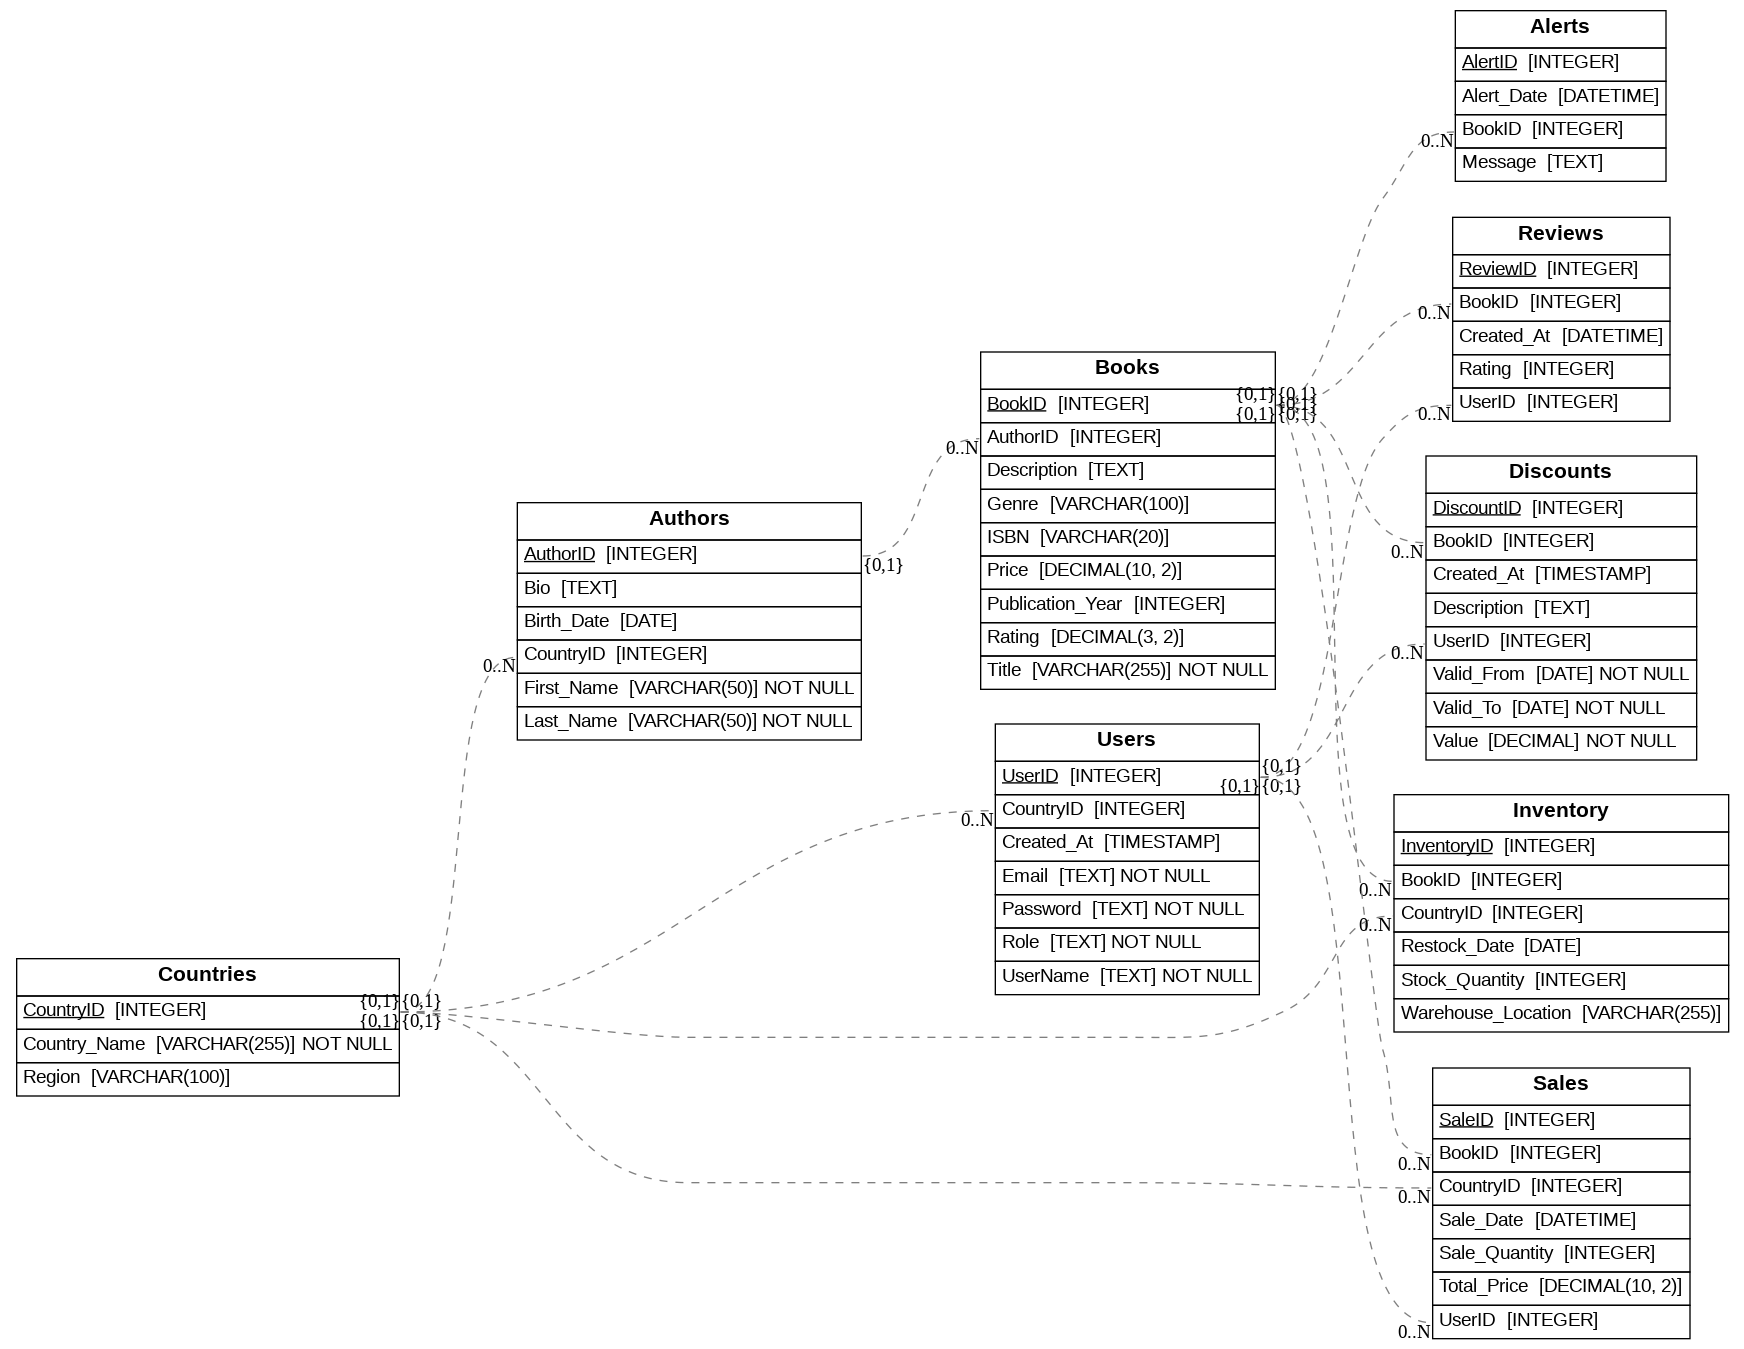

In [20]:
# Draw the diagram
output_path = 'er_diagram.png'
# Generate ER diagram
render_er(f'sqlite:///{DB_NAME}', output_path)
# Display the ER diagram
Image(output_path)

## **4.12 : Verify Table Structure**

In [21]:
# Verify Table Structure
# Get all the tables in the Database
Table_Names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
for table in Table_Names['name']:
  print(f"Table : {table}")
  print(conn.execute(f"PRAGMA table_info{table};"))
  #Display the structre
  print(pd.read_sql_query(f"PRAGMA table_info({table});", conn))
  print("-"*50)


Table : Countries
   cid          name          type  notnull dflt_value  pk
0    0     CountryID       INTEGER        0       None   1
1    1  Country_Name  VARCHAR(255)        1       None   0
2    2        Region  VARCHAR(100)        0       None   0
--------------------------------------------------
Table : Users
   cid        name       type  notnull         dflt_value  pk
0    0      UserID    INTEGER        0               None   1
1    1    UserName       TEXT        1               None   0
2    2       Email       TEXT        1               None   0
3    3    Password       TEXT        1               None   0
4    4        Role       TEXT        1               None   0
5    5  Created_At  TIMESTAMP        0  CURRENT_TIMESTAMP   0
6    6   CountryID    INTEGER        0               None   0
--------------------------------------------------
Table : Authors
   cid        name         type  notnull dflt_value  pk
0    0    AuthorID      INTEGER        0       None   1
1    1

## **4.13 Insert Some Data to the tables**

### **4.13.1 Inserting Some Data to Countries Table**

In [22]:
# Insert Countires to Countries Table
countries = [
    ('Egypt', 'Africa'),
    ('Saudi Arabia', 'Middle East'),
    ('Lebanon', 'Middle East'),
    ('United States', 'North America'),
    ('France', 'Europe'),
    ('Germany', 'Europe'),
    ('United Kingdom', 'Europe'),
    ('Japan', 'Asia'),
    ('China', 'Asia'),
    ('India', 'Asia')
]
cursor.executemany('INSERT INTO Countries (Country_Name, Region) VALUES (?, ?)', countries)
conn.commit()
print("✅ Countries data populated successfully.")

# Display The records
countries_df = pd.read_sql_query("SELECT * FROM Countries;", conn)
countries_df

✅ Countries data populated successfully.


,CountryID,Country_Name,Region
0,1,Egypt,Africa
1,2,Saudi Arabia,Middle East
2,3,Lebanon,Middle East
3,4,United States,North America
4,5,France,Europe
5,6,Germany,Europe
6,7,United Kingdom,Europe
7,8,Japan,Asia
8,9,China,Asia
9,10,India,Asia


### **4.13.2 Inserting Some Data to Authors Table**

In [23]:
# Inserting some data into Authors Table
authors = [
    ('Naguib', 'Mahfouz', 'Egyptian novelist, Nobel Prize winner', '1911-12-11', 1),  # Naguib Mahfouz --->  Egypt
    ('Gibrán ', 'Márquez', 'Lebanese-American writer and poet', '1883-01-06', 3),     # Gibrán Márquez  ----> Lebanon
    ('George', 'Orwell', 'English novelist and essayist', '1903-06-25', 7),           # George Orwell  ----> United Kingdom
    ('J.K.', 'Rowling', 'British author of Harry Potter series', '1965-07-31', 7),    # J.K Rowling   -----> United Kingdom
    ('Albert', 'Camus', 'French philosopher and author', '1913-11-07', 5),            # Albert Camus ------> France
    ('Taha', 'Hussein', 'Egyptian writer and intellectual', '1889-11-14', 1)          # Taha Hussein ------> Egypt
]
cursor.executemany('INSERT INTO Authors (First_Name, Last_Name, Bio, Birth_Date, CountryID) VALUES (?, ?, ?, ?, ?)', authors)
conn.commit()
print("✅ Authors data populated successfully.")

# Display the records
authors_df = pd.read_sql_query("SELECT * FROM Authors;", conn)
authors_df

✅ Authors data populated successfully.


,AuthorID,First_Name,Last_Name,Bio,Birth_Date,CountryID
0,1,Naguib,Mahfouz,"Egyptian novelist, Nobel Prize winner",1911-12-11,1
1,2,Gibrán,Márquez,Lebanese-American writer and poet,1883-01-06,3
2,3,George,Orwell,English novelist and essayist,1903-06-25,7
3,4,J.K.,Rowling,British author of Harry Potter series,1965-07-31,7
4,5,Albert,Camus,French philosopher and author,1913-11-07,5
5,6,Taha,Hussein,Egyptian writer and intellectual,1889-11-14,1


### **4.13.3 Inserting Some Data to Books Table**

In [24]:
# Get a random number of ISBN
def get_random_isbn():
    return str(random.randint(1000000000, 9999999999))

In [25]:
# Inserting some data into Books Table
books = [
    ('Al-Qahira Al-Jadida', 'Fiction', 1945, get_random_isbn(), 12.99, 4.5, 'A classic novel by Naguib Mahfouz', 1),                            # Al-Qahira Al-Jadida ---> Naguib Mahfouz
    ('The Prophet,', 'Philosophy', 1923, get_random_isbn(), 9.99, 4.8, 'A poetic book by Khalil Gibran', 2),                                    # The Prophet   ------->   Gibrán Márquez
    ('1984', 'Dystopian', 1949, get_random_isbn(), 15.99, 4.7, 'A dystopian novel by George Orwell', 3),                                        # 1984 ----> George Orwell
    ('Harry Potter and the Sorcerer\'s Stone', 'Fantasy', 1997, get_random_isbn(), 20.99, 4.9, 'The first Harry Potter book', 4),               # Harrpy Potter ----> J.K Rowling
    ('The Plague', 'Philosophy', 1947, get_random_isbn(), 13.99, 4.6, 'A novel about human resilience', 5),                                     # The Plague -----> Akbert Camus
    ('El-Ayam', 'Biography', 1929, get_random_isbn(), 8.99, 4.3, 'A memoir by Taha Hussein', 6),                                                # El-Ayam ------> Taha Hussein
    ('Animal Farm', 'Satire', 1945, get_random_isbn(), 10.99, 4.5, 'A satirical novella by George Orwell', 3),                                  # Animal Farm -----> George Orwell
    ('Harry Potter and the Chamber of Secrets', 'Fantasy', 1998, get_random_isbn(), 21.99, 4.8, 'The second Harry Potter book', 4),             # Harrt Potter -----> J.K Rowling
    ('L’Étranger', 'Philosophy', 1942, get_random_isbn() ,11.99, 4.4, 'A novel by Albert Camus', 5),                                            # L'Etranger ------> Albert Camus
    ('Al-Bukhla', 'Comedy', 1900, get_random_isbn(), 7.99, 4.1, 'Classic Arabic literature', 6)                                                 # Al-Bukhla -------> Taha Hussein
]
cursor.executemany('INSERT INTO Books (Title, Genre, Publication_Year, ISBN, Price, Rating, Description, AuthorID) VALUES (?, ?, ?, ?, ?, ?, ?, ?)', books)
conn.commit()
print("✅ Books data populated successfully.")

# Display the records
books_df = pd.read_sql_query("SELECT * FROM Books;", conn)
books_df

✅ Books data populated successfully.


,BookID,Title,Genre,Publication_Year,ISBN,Price,Rating,Description,AuthorID
0,1,Al-Qahira Al-Jadida,Fiction,1945,4329801056,12.99,4.5,A classic novel by Naguib Mahfouz,1
1,2,"The Prophet,",Philosophy,1923,6850448677,9.99,4.8,A poetic book by Khalil Gibran,2
2,3,1984,Dystopian,1949,9199005188,15.99,4.7,A dystopian novel by George Orwell,3
3,4,Harry Potter and the Sorcerer's Stone,Fantasy,1997,2345707981,20.99,4.9,The first Harry Potter book,4
4,5,The Plague,Philosophy,1947,1767417620,13.99,4.6,A novel about human resilience,5
5,6,El-Ayam,Biography,1929,4499001815,8.99,4.3,A memoir by Taha Hussein,6
6,7,Animal Farm,Satire,1945,6992548521,10.99,4.5,A satirical novella by George Orwell,3
7,8,Harry Potter and the Chamber of Secrets,Fantasy,1998,3886877961,21.99,4.8,The second Harry Potter book,4
8,9,L’Étranger,Philosophy,1942,6968480878,11.99,4.4,A novel by Albert Camus,5
9,10,Al-Bukhla,Comedy,1900,8376962423,7.99,4.1,Classic Arabic literature,6


### **4.13.4 Inserting Some Data to Users Table**

In [26]:
# Inserting some data into Users Table
users = [
    ('Ahmed Hesham', 'ahmed@gmail.com', 'password123', 'customer', 1),        # Ahmed from Egypt
    ('Aya Amr', 'aya@gmail.com', 'password123', 'admin', 1),                  # Aya from Egypt
    ('Nadia Ahmed', 'Nadia@gmail.com', 'password123', 'customer', 1),         # Nadia from  Egypt
    ('Abanoub', 'abanoub@gmailcom', 'password123', 'admin', 1),               # Abanoub from Egypt
    ('Kerols', 'Kerols@gmail.com', 'password123', 'customer', 1),             # Kerols from Egypt
    ('hans_Kingdom', 'hans@gmail.com', 'password123', 'customer', 7),         # Hans from United Kingdom
    ('ahmed_user', 'ahmeduser@gmail.com', 'password123', 'customer', 2),      # Ahmed from Saudia
    ('nada_user', 'nada2@gmail.com', 'password123', 'admin', 3),              # Nada from Lebanon
    ('john_doe', 'john@gmail.com', 'password123', 'customer', 7),             # John from United Kingdom
    ('maria_smith', 'maria@gmail.com', 'password123', 'admin', 7),            # Maria from United Kingdom
    ('francois', 'francois@egmail.com', 'password123', 'customer', 5),        # Francois from France
    ('hans_Lebanon', 'hans22@egmail.com', 'password123', 'customer', 3),      # Hans from Lebanon
    ('hans_India', 'handIndia@gmail.com','password1234','customer',10),       # Hans from India
    ('hans_China', 'handChina@gmail.com','password1234','customer',9),        # Hans from China
    ('hans_Germany', 'handGermany@gmail.com','password1234','customer',6),    # Hans from India
    ('hans_States', 'handStates@gmail.com','password1234','customer',4),      # Hans from States
    ('hans_Japain', 'handJapan@gmail.com','password1234','customer',8),       # Hans from Japan
    ('Henry', 'Henry@gmail.com','password1234','customer',5),                 # Henry from France
    ('Kounde', 'Kounde@gmail.com','password1234','customer',5),              # Kounde from 5
]
cursor.executemany('INSERT INTO Users (UserName, Email, Password, Role, CountryID) VALUES (?, ?, ?, ?, ?)', users)
conn.commit()
print("✅ Users data populated successfully.")

# Display the records
users_df = pd.read_sql_query("SELECT * FROM Users;", conn)
users_df


✅ Users data populated successfully.


,UserID,UserName,Email,Password,Role,Created_At,CountryID
0,1,Ahmed Hesham,ahmed@gmail.com,password123,customer,2025-01-13 13:11:57,1
1,2,Aya Amr,aya@gmail.com,password123,admin,2025-01-13 13:11:57,1
2,3,Nadia Ahmed,Nadia@gmail.com,password123,customer,2025-01-13 13:11:57,1
3,4,Abanoub,abanoub@gmailcom,password123,admin,2025-01-13 13:11:57,1
4,5,Kerols,Kerols@gmail.com,password123,customer,2025-01-13 13:11:57,1
5,6,hans_Kingdom,hans@gmail.com,password123,customer,2025-01-13 13:11:57,7
6,7,ahmed_user,ahmeduser@gmail.com,password123,customer,2025-01-13 13:11:57,2
7,8,nada_user,nada2@gmail.com,password123,admin,2025-01-13 13:11:57,3
8,9,john_doe,john@gmail.com,password123,customer,2025-01-13 13:11:57,7
9,10,maria_smith,maria@gmail.com,password123,admin,2025-01-13 13:11:57,7


### **4.13.5 Inserting Some Data to Inventory Table**

In [27]:
# Inserting some data into Inventory Table
inventory = [
    (1, 20, '2025-01-01', 'Warehouse A', 1),  # Al-Qahira Al-Jadida by Naguib Mahfouz                 ----->  Egypt
    (2, 15, '2025-01-05', 'Warehouse B', 3),  # The Prophet by Khalil Gibran                          ----->  Lebanon
    (3, 30, '2025-01-10', 'Warehouse C', 7),  # 1984 by George Orwell                                 ----->  United Kingdom
    (4, 25, '2025-01-07', 'Warehouse D', 7),  # Harry Potter and the Sorcerer\'s Stone                ----->  United Kingdom
    (5, 35, '2025-01-15', 'Warehouse E', 5),  # The Plague by Albert Camus                            ----->  France
    (6, 40, '2025-01-20', 'Warehouse F', 6),  # The Days by Taha Hussein,                             ----->  Germany
    (7, 50, '2025-01-25', 'Warehouse G', 3),  # Animal Farm by George Orwell                          ----->  Lebanon
    (8, 10, '2025-01-30', 'Warehouse H', 4),  # Harry Poter and the chamber of Secrets by J.K Rowling ----->  United States
    (9, 15, '2025-02-01', 'Warehouse I', 5),  # L’Étranger by Albert Camus in France                  ----->  France
    (10, 20, '2025-02-05', 'Warehouse J', 1), # Al-Bukhla by Taha Hussein                             ----->  Egypt
    (1, 22, '2025-02-05', 'Warehouse K', 1), # Al-Bukhla by Taha Hussein                             ----->  Egypt
]
cursor.executemany('INSERT INTO Inventory (BookID, Stock_Quantity, Restock_Date, Warehouse_Location, CountryID) VALUES (?, ?, ?, ?, ?)', inventory)
conn.commit()
print("✅ Inventory data populated successfully.")

# Display the records
inventory_df = pd.read_sql_query("SELECT * FROM Inventory;", conn)
inventory_df


✅ Inventory data populated successfully.


,InventoryID,BookID,Stock_Quantity,Restock_Date,Warehouse_Location,CountryID
0,1,1,20,2025-01-01,Warehouse A,1
1,2,2,15,2025-01-05,Warehouse B,3
2,3,3,30,2025-01-10,Warehouse C,7
3,4,4,25,2025-01-07,Warehouse D,7
4,5,5,35,2025-01-15,Warehouse E,5
5,6,6,40,2025-01-20,Warehouse F,6
6,7,7,50,2025-01-25,Warehouse G,3
7,8,8,10,2025-01-30,Warehouse H,4
8,9,9,15,2025-02-01,Warehouse I,5
9,10,10,20,2025-02-05,Warehouse J,1


### **4.13.6 Inserting Some Data to Sales Table**

In [28]:
# Test Trigger to Update Inventory After a Sale

# Print the Qauntity Befor Sales
inventory_before_sales_df = pd.read_sql_query("SELECT * FROM Inventory;", conn)

# Inserting some data into Sales Table
sales = [
    ('2025-01-01', 5, 64.95, 1, 1, 1),  # Sale of Cairo New City in Egypt
    ('2025-01-02', 3, 29.97, 2, 2, 3),  # Sale of The Prophet in Lebanon
    ('2025-01-03', 7, 111.93, 3, 3, 7),  # Sale of 1984 in United Kingdom
    ('2025-01-04', 6, 83.94, 4, 4, 7),  # Sale of Harry Potter and the Sorcerer\'s Stone
    ('2025-01-05', 4, 55.96, 5, 5, 5),  # Sale of The Plague by Albert Camus
    ('2025-01-06', 8, 71.92, 6, 6, 6),  # Sale of The Days by Taha Hussein
    ('2025-01-06', 10, 71.92, 7, 6, 6),  # Sale of The Days by Taha Hussein
]
cursor.executemany('INSERT INTO Sales (Sale_Date, Sale_Quantity, Total_Price, BookID, UserID, CountryID) VALUES (?, ?, ?, ?, ?, ?)', sales)
conn.commit()
print("✅ Sales data populated successfully.")

# Display the records
sales_df = pd.read_sql_query("SELECT * FROM Sales;", conn)
sales_df

✅ Sales data populated successfully.


,SaleID,Sale_Date,Sale_Quantity,Total_Price,BookID,UserID,CountryID
0,1,2025-01-01,5,64.95,1,1,1
1,2,2025-01-02,3,29.97,2,2,3
2,3,2025-01-03,7,111.93,3,3,7
3,4,2025-01-04,6,83.94,4,4,7
4,5,2025-01-05,4,55.96,5,5,5
5,6,2025-01-06,8,71.92,6,6,6
6,7,2025-01-06,10,71.92,7,6,6


In [29]:
# Compare Quntites before and after sales
inventory_after_sales_df = pd.read_sql_query("SELECT * FROM Inventory;", conn)
print("Inventory Before Sales")
display(inventory_before_sales_df)
print("Inventory After Sales")
display(inventory_after_sales_df)

Inventory Before Sales


,InventoryID,BookID,Stock_Quantity,Restock_Date,Warehouse_Location,CountryID
0,1,1,20,2025-01-01,Warehouse A,1
1,2,2,15,2025-01-05,Warehouse B,3
2,3,3,30,2025-01-10,Warehouse C,7
3,4,4,25,2025-01-07,Warehouse D,7
4,5,5,35,2025-01-15,Warehouse E,5
5,6,6,40,2025-01-20,Warehouse F,6
6,7,7,50,2025-01-25,Warehouse G,3
7,8,8,10,2025-01-30,Warehouse H,4
8,9,9,15,2025-02-01,Warehouse I,5
9,10,10,20,2025-02-05,Warehouse J,1


Inventory After Sales


,InventoryID,BookID,Stock_Quantity,Restock_Date,Warehouse_Location,CountryID
0,1,1,15,2025-01-01,Warehouse A,1
1,2,2,12,2025-01-05,Warehouse B,3
2,3,3,23,2025-01-10,Warehouse C,7
3,4,4,19,2025-01-07,Warehouse D,7
4,5,5,31,2025-01-15,Warehouse E,5
5,6,6,32,2025-01-20,Warehouse F,6
6,7,7,40,2025-01-25,Warehouse G,3
7,8,8,10,2025-01-30,Warehouse H,4
8,9,9,15,2025-02-01,Warehouse I,5
9,10,10,20,2025-02-05,Warehouse J,1


In [30]:
display_new_alerts()

✅ No new alerts.


### **4.13.7 Inserting Some Data to Discount Table**

In [31]:
# Inserting some data into Discount Table
discounts = [
    (1, 0.10, '2025-01-01', '2025-01-10', '2025-01-01', 1),  # Discount on Cairo New City by Naguib Mahfouz
    (2, 0.15, '2025-01-05', '2025-01-15', '2025-01-05', 2),  # Discount on The Prophet by Khalil Gibran
    (3, 0.20, '2025-01-07', '2025-01-14', '2025-01-07', 3),  # Discount on 1984 by George Orwell
    (4, 0.25, '2025-01-08', '2025-01-20', '2025-01-08', 4),  # Discount on Harry Potter and the Sorcerer\'s Stone
    (5, 0.30, '2025-01-10', '2025-01-25', '2025-01-10', 5),  # Discount on The Plague by Albert Camus
    (6, 0.05, '2025-01-12', '2025-01-18', '2025-01-12', 6),  # Discount on The Days by Taha Hussein
]

cursor.executemany('INSERT INTO Discounts (BookID, Value, Valid_From, Valid_To, Created_At, UserID) VALUES (?, ?, ?, ?, ?, ?)', discounts)
conn.commit()
print("✅ Discount data populated successfully.")

# Display the records
discounts_df = pd.read_sql_query("SELECT * FROM Discounts;", conn)
discounts_df


✅ Discount data populated successfully.


,DiscountID,Description,Value,Valid_From,Valid_To,Created_At,BookID,UserID
0,1,None,0.10,2025-01-01,2025-01-10,2025-01-01,1,1
1,2,None,0.15,2025-01-05,2025-01-15,2025-01-05,2,2
2,3,None,0.20,2025-01-07,2025-01-14,2025-01-07,3,3
3,4,None,0.25,2025-01-08,2025-01-20,2025-01-08,4,4
4,5,None,0.30,2025-01-10,2025-01-25,2025-01-10,5,5
5,6,None,0.05,2025-01-12,2025-01-18,2025-01-12,6,6


### **4.13.8 Inserting Some Data to Reviews Table**

In [32]:
# Inserting some data into Reviews Table
reviews = [
    (1, 5, 1),  # Excellent review for Cairo New City
    (2, 4, 2),  # Great review for The Prophet
    (3, 4, 3),  # Great review for 1984
    (4, 5, 4),  # Amazing review for Harry Potter and the Sorcerer's Stone
    (5, 4, 5),  # Excellent review for The Plague
    (6, 3,  6),  # Good review for The Days
]

cursor.executemany('INSERT INTO Reviews (BookID, Rating , UserID) VALUES (?, ?, ?)', reviews)
conn.commit()
print("✅ Reviews data populated successfully.")

# Display the records
reviews_df = pd.read_sql_query("SELECT * FROM Reviews;", conn)
reviews_df


✅ Reviews data populated successfully.


,ReviewID,Rating,Created_At,BookID,UserID
0,1,5,2025-01-13 13:11:57,1,1
1,2,4,2025-01-13 13:11:57,2,2
2,3,4,2025-01-13 13:11:57,3,3
3,4,5,2025-01-13 13:11:57,4,4
4,5,4,2025-01-13 13:11:57,5,5
5,6,3,2025-01-13 13:11:57,6,6


# 📌 **4. Task 3 : Connect Python to SQLite**
**Description**: You will establish a connection from Python to your SQLite database. This connection will be used in subsequent tasks to run queries, insert data, and retrieve results
Requirements:

**Requirments**:
  1.  Use Python’s built-in sqlite3 module to connect to the bookbazaar.db file.
  2.  Implement proper error handling in case the connection fails.
  3.  Confirm that you can successfully connect and close the connection.

**Responsible:** Menna Mohamed and Ahmed Hesham

In [33]:
def connect_to_database(db_name):
    """
    Establish a connection to the SQLite database.
    Args:
        db_name (str): The name of the database file.
    Returns:
        connection (sqlite3.Connection): SQLite database connection object.
    """
    try:
        # Connecting to SQLite database
        connection = sqlite3.connect(db_name)
        # Ensure that our application have the permission to read and write to the database
        connection.execute("PRAGMA journal_mode=WAL;")
        print(f"✅ Successfully connected to the database: {db_name}")
        return connection
    except sqlite3.Error as e:
        print(f"❌ Error while connecting to the database: {e}")
        return None

def close_connection(connection):
    """
    Close the SQLite database connection.
    Args:
        connection (sqlite3.Connection): SQLite database connection object.
    """
    if connection:
        connection.close()
        print("✅ Database connection closed successfully.")
    else:
        print("❌ No connection to close.")


def save_database_backup(db_name, backup_dir='/content/backups'):
    """
    Save a backup of the SQLite database.
    Args:
        db_name (str): The name of the SQLite database file.
        backup_dir (str): Directory where the backup will be saved.
    """
    try:
        # Ensure the backup directory exists
        if not os.path.exists(backup_dir):
            os.makedirs(backup_dir)

        # Define the backup file name (you can append timestamps to make it unique)
        backup_file = os.path.join(backup_dir, f"backup_{os.path.basename(db_name)}")

        # Copy the database to the backup location
        shutil.copy(db_name, backup_file)
        print(f"✅ Backup saved successfully: {backup_file}")

    except Exception as e:
        print(f"❌ Error while saving backup: {e}")



# Connect to the database
conn = connect_to_database(DB_NAME)

# Save Backup
save_database_backup(DB_NAME)

# Close the connection
close_connection(conn)


✅ Successfully connected to the database: bookbazaar.db
✅ Backup saved successfully: /content/backups/backup_bookbazaar.db
✅ Database connection closed successfully.


# New Section

# 📌 **5. Task 4 : Implement CRUD Operations on SQLite via Python**
**Description**: You will create functions in Python to perform Create, Read, Update, and Delete (CRUD) operations on your SQLite database.
Requirements:

**Requirments**:
  1.    Write functions to insert a new book into the Books table.
  2.    Write functions to retrieve book details by ID or to list all books.
  3.    Write functions to update a book’s information (e.g., genre, title).
  4.    Write functions to delete a book by its ID.
  5.    Ensure your functions handle errors gracefully (e.g., if a book ID does not exist).

**Responsible:** Menna Mohamed and Ahmed Hesham

##  **5.1 Write functions to insert a new book into the Books table.**

In [34]:
def add_book(title, author_id, genre, published_year=None, isbn=None, price=None, rating=0, description=None):
    """
    Add a new book to the Books table.

    Args:
        title (str): Title of the book.
        author_id (int): The ID of the author of the book.
        genre (str): Genre of the book.
        published_year (int,optional): The year the book was published.
        isbn (str, optional): ISBN number of the book (default is None).
        price (float, optional): Price of the book (default is None).
        rating (float, optional): Rating of the book (default is 0).
        description (str, optional): Description of the book (default is None).

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.executemany('INSERT INTO Books (Title, Genre, Publication_Year, ISBN, Price, Rating, Description, AuthorID) VALUES (?, ?, ?, ?, ?, ?, ?, ?)', books)
        conn.commit()
        print(f"Book '{title}' added successfully.")
    except sqlite3.Error as e:
        print(f"Error adding book: {e}")
    finally:
        conn.close()

In [35]:
add_book("Title1",3,"Comedy")

✅ Successfully connected to the database: bookbazaar.db
Error adding book: UNIQUE constraint failed: Books.ISBN


##  **5.2 Write functions to retrieve book details by ID or to list all books.**

In [36]:
def get_book_by_id(book_ids):
    """
    Get book details by BookID or a list of BookIDs.

    Args:
        book_ids (int, list of int): BookID or list of BookIDs to fetch.

    Returns:
        None
    """
    if isinstance(book_ids, int):  # If it's a single ID
        book_ids = [book_ids]

    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        for book_id in book_ids:
            cursor.execute('SELECT * FROM Books WHERE BookID = ?', (book_id,))
            book = cursor.fetchone()
            if book:
                print("\n📚 Book Details:")
                print("=" * 50)
                print(f"Book ID: {book[0]}")
                print(f"Title: {book[1]}")
                print(f"Genre: {book[2]}")
                print(f"Publication Year: {book[3]}")
                print(f"ISBN: {book[4]}")
                print(f"Price: ${book[5]:.2f}")
                print(f"Rating: {book[6]}")
                print(f"Description: {book[7]}")
                print(f"AuthorID: {book[8]}")
                print("=" * 50)
            else:
                print(f"Book with ID {book_id} not found.")
    except sqlite3.Error as e:
        print(f"Error retrieving book: {e}")
    finally:
        conn.close()

In [37]:
get_book_by_id(1)

✅ Successfully connected to the database: bookbazaar.db

📚 Book Details:
Book ID: 1
Title: Al-Qahira Al-Jadida
Genre: Fiction
Publication Year: 1945
ISBN: 4329801056
Price: $12.99
Rating: 4.5
Description: A classic novel by Naguib Mahfouz
AuthorID: 1


In [38]:
get_book_by_id([1,2,3,4])

✅ Successfully connected to the database: bookbazaar.db

📚 Book Details:
Book ID: 1
Title: Al-Qahira Al-Jadida
Genre: Fiction
Publication Year: 1945
ISBN: 4329801056
Price: $12.99
Rating: 4.5
Description: A classic novel by Naguib Mahfouz
AuthorID: 1

📚 Book Details:
Book ID: 2
Title: The Prophet,
Genre: Philosophy
Publication Year: 1923
ISBN: 6850448677
Price: $9.99
Rating: 4.8
Description: A poetic book by Khalil Gibran
AuthorID: 2

📚 Book Details:
Book ID: 3
Title: 1984
Genre: Dystopian
Publication Year: 1949
ISBN: 9199005188
Price: $15.99
Rating: 4.7
Description: A dystopian novel by George Orwell
AuthorID: 3

📚 Book Details:
Book ID: 4
Title: Harry Potter and the Sorcerer's Stone
Genre: Fantasy
Publication Year: 1997
ISBN: 2345707981
Price: $20.99
Rating: 4.9
Description: The first Harry Potter book
AuthorID: 4


## **5.3  Write functions to update a book’s information (e.g., genre, title).**

In [39]:
def get_all_books():
    """
    List all books in the Books table in a nice format.

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.execute('SELECT * FROM Books')
        books = cursor.fetchall()
        if books:
            print("\n📚 All Books:")
            for book in books:
                print(f"Book ID: {book[0]}")
                print(f"Title: {book[1]}")
                print(f"Genre: {book[2]}")
                print(f"Publication Year: {book[3]}")
                print(f"ISBN: {book[4]}")
                print(f"Price: ${book[5]:.2f}")
                print(f"Rating: {book[6]}")
                print(f"Description: {book[7]}")
                print(f"AuthorID: {book[8]}")
                print("=" * 50)
        else:
            print("No books found.")
    except sqlite3.Error as e:
        print(f"Error retrieving books: {e}")
    finally:
        conn.close()

In [40]:
get_all_books()

✅ Successfully connected to the database: bookbazaar.db

📚 All Books:
Book ID: 1
Title: Al-Qahira Al-Jadida
Genre: Fiction
Publication Year: 1945
ISBN: 4329801056
Price: $12.99
Rating: 4.5
Description: A classic novel by Naguib Mahfouz
AuthorID: 1
Book ID: 2
Title: The Prophet,
Genre: Philosophy
Publication Year: 1923
ISBN: 6850448677
Price: $9.99
Rating: 4.8
Description: A poetic book by Khalil Gibran
AuthorID: 2
Book ID: 3
Title: 1984
Genre: Dystopian
Publication Year: 1949
ISBN: 9199005188
Price: $15.99
Rating: 4.7
Description: A dystopian novel by George Orwell
AuthorID: 3
Book ID: 4
Title: Harry Potter and the Sorcerer's Stone
Genre: Fantasy
Publication Year: 1997
ISBN: 2345707981
Price: $20.99
Rating: 4.9
Description: The first Harry Potter book
AuthorID: 4
Book ID: 5
Title: The Plague
Genre: Philosophy
Publication Year: 1947
ISBN: 1767417620
Price: $13.99
Rating: 4.6
Description: A novel about human resilience
AuthorID: 5
Book ID: 6
Title: El-Ayam
Genre: Biography
Publication Ye

## **5.4  Write functions to delete a book by its ID.**

In [41]:
def delete_book(book_id):
    """
    Delete a book by its BookID.

    Args:
        book_id (int): BookID of the book to be deleted.

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.execute('DELETE FROM Books WHERE BookID = ?', (book_id,))
        conn.commit()
        if cursor.rowcount > 0:
            print(f"Book with ID {book_id} deleted successfully.")
        else:
            print(f"No book found with ID {book_id}.")
    except sqlite3.Error as e:
        print(f"Error deleting book: {e}")
    finally:
        conn.close()


In [42]:
delete_book(122)

✅ Successfully connected to the database: bookbazaar.db
No book found with ID 122.


In [43]:
delete_book(2)

✅ Successfully connected to the database: bookbazaar.db
Book with ID 2 deleted successfully.


In [44]:
get_all_books()

✅ Successfully connected to the database: bookbazaar.db

📚 All Books:
Book ID: 1
Title: Al-Qahira Al-Jadida
Genre: Fiction
Publication Year: 1945
ISBN: 4329801056
Price: $12.99
Rating: 4.5
Description: A classic novel by Naguib Mahfouz
AuthorID: 1
Book ID: 3
Title: 1984
Genre: Dystopian
Publication Year: 1949
ISBN: 9199005188
Price: $15.99
Rating: 4.7
Description: A dystopian novel by George Orwell
AuthorID: 3
Book ID: 4
Title: Harry Potter and the Sorcerer's Stone
Genre: Fantasy
Publication Year: 1997
ISBN: 2345707981
Price: $20.99
Rating: 4.9
Description: The first Harry Potter book
AuthorID: 4
Book ID: 5
Title: The Plague
Genre: Philosophy
Publication Year: 1947
ISBN: 1767417620
Price: $13.99
Rating: 4.6
Description: A novel about human resilience
AuthorID: 5
Book ID: 6
Title: El-Ayam
Genre: Biography
Publication Year: 1929
ISBN: 4499001815
Price: $8.99
Rating: 4.3
Description: A memoir by Taha Hussein
AuthorID: 6
Book ID: 7
Title: Animal Farm
Genre: Satire
Publication Year: 1945
IS

## **5.5 update_book(book_id, title=None, genre=None, published_year=None, isbn=None, price=None, rating=None, description=None)**

In [45]:
def update_book(book_id, title=None, genre=None, published_year=None, isbn=None, price=None, rating=None, description=None):
    """
    Update book details.

    Args:
        book_id (int): BookID of the book to be updated.
        title (str, optional): New title of the book (default is None).
        genre (str, optional): New genre of the book (default is None).
        published_year (int, optional): New published year of the book (default is None).
        isbn (str, optional): New ISBN of the book (default is None).
        price (float, optional): New price of the book (default is None).
        rating (float, optional): New rating of the book (default is None).
        description (str, optional): New description of the book (default is None).

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        query = 'UPDATE Books SET '
        params = []
        if title:
            query += 'title = ?, '
            params.append(title)
        if genre:
            query += 'genre = ?, '
            params.append(genre)
        if published_year:
            query += 'published_year = ?, '
            params.append(published_year)
        if isbn:
            query += 'ISBN = ?, '
            params.append(isbn)
        if price:
            query += 'Price = ?, '
            params.append(price)
        if rating:
            query += 'Rating = ?, '
            params.append(rating)
        if description:
            query += 'Description = ?, '
            params.append(description)

        query = query.rstrip(', ')  # Remove trailing comma
        query += ' WHERE BookID = ?'
        params.append(book_id)

        cursor.execute(query, tuple(params))
        conn.commit()

        if cursor.rowcount > 0:
            print(f"Book with ID {book_id} updated successfully.")
        else:
            print(f"No book found with ID {book_id}.")
    except sqlite3.Error as e:
        print(f"Error updating book: {e}")
    finally:
        conn.close()

In [46]:
# Try To Update a book that doesn't exist
update_book(1,"temp","temp")

✅ Successfully connected to the database: bookbazaar.db
Book with ID 1 updated successfully.


In [47]:
# Try To Update Book with ID3
# Display the before before update
get_book_by_id(4)
update_book(4,"temp","temp")
get_book_by_id(4)

✅ Successfully connected to the database: bookbazaar.db

📚 Book Details:
Book ID: 4
Title: Harry Potter and the Sorcerer's Stone
Genre: Fantasy
Publication Year: 1997
ISBN: 2345707981
Price: $20.99
Rating: 4.9
Description: The first Harry Potter book
AuthorID: 4
✅ Successfully connected to the database: bookbazaar.db
Book with ID 4 updated successfully.
✅ Successfully connected to the database: bookbazaar.db

📚 Book Details:
Book ID: 4
Title: temp
Genre: temp
Publication Year: 1997
ISBN: 2345707981
Price: $20.99
Rating: 4.9
Description: The first Harry Potter book
AuthorID: 4


## **5.6 Write a function to insert a new Author**

In [48]:
def add_author(First_Name:str,Last_Name:str, bio=None, Birth_Date=None, CountryID=1):
    """
    Add a new author to the Authors table.

    Args:
        First_Name (str): First name of the author.
        Last_Name (str): Last name of the author.
        bio (str, optional): A brief biography of the author (default is None).
        Birth_Date (str, optional): The date of birth of the author (default is None).
        CountryID (int, optional): The ID of the country of the author (default is 1).


    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        query = 'INSERT INTO Authors (First_Name, Last_Name, Bio, Birth_Date, CountryID) VALUES (?, ?, ?, ?, ?)'
        cursor.execute(query, (First_Name, Last_Name, bio, Birth_Date, CountryID))
        conn.commit()
        print(f"Author '{First_Name} {Last_Name}' added successfully.")
    except sqlite3.Error as e:
        print(f"Error adding author: {e}")
    finally:
        conn.close()


In [49]:
add_author(First_Name="Ahmed",Last_Name="Khalil",bio="An Egyptian new Author",Birth_Date='1990-1-1',CountryID=1)

✅ Successfully connected to the database: bookbazaar.db
Author 'Ahmed Khalil' added successfully.


## **5.7 Write a function to get all authors**

In [50]:
def get_all_authors():
    """
    Retrieve and display all authors from the Authors table.

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.execute('SELECT * FROM Authors')
        authors = cursor.fetchall()
        if authors:
            print("\n👩‍💻 All Authors:")
            print("=" * 50)
            for author in authors:
                print(f"Author ID: {author[0]}")
                print(f"First_Name: {author[1]}")
                print(f"Last_Name: {author[2]}")
                print(f"Bio: {author[3]}")
                print(f"Birth_Date: {author[4]}")
                print(f"CountryID: {author[5]}")
                print("=" * 50)
        else:
            print("No authors found.")
    except sqlite3.Error as e:
        print(f"Error retrieving authors: {e}")
    finally:
        conn.close()

In [51]:
get_all_authors()

✅ Successfully connected to the database: bookbazaar.db

👩‍💻 All Authors:
Author ID: 1
First_Name: Naguib
Last_Name: Mahfouz
Bio: Egyptian novelist, Nobel Prize winner
Birth_Date: 1911-12-11
CountryID: 1
Author ID: 2
First_Name: Gibrán 
Last_Name: Márquez
Bio: Lebanese-American writer and poet
Birth_Date: 1883-01-06
CountryID: 3
Author ID: 3
First_Name: George
Last_Name: Orwell
Bio: English novelist and essayist
Birth_Date: 1903-06-25
CountryID: 7
Author ID: 4
First_Name: J.K.
Last_Name: Rowling
Bio: British author of Harry Potter series
Birth_Date: 1965-07-31
CountryID: 7
Author ID: 5
First_Name: Albert
Last_Name: Camus
Bio: French philosopher and author
Birth_Date: 1913-11-07
CountryID: 5
Author ID: 6
First_Name: Taha
Last_Name: Hussein
Bio: Egyptian writer and intellectual
Birth_Date: 1889-11-14
CountryID: 1
Author ID: 7
First_Name: Ahmed
Last_Name: Khalil
Bio: An Egyptian new Author
Birth_Date: 1990-1-1
CountryID: 1


## **5.8 Write a function to get Stock Quantity in the Inventories**

In [52]:
def get_all_quantities():
    """
    Retrieve and display the quantities of all books in the inventory.

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.execute('SELECT * FROM Inventory')
        inventory = cursor.fetchall()
        if inventory:
            print("\n📦 All Inventory Quantities:")
            print("=" * 50)
            for item in inventory:
                print(f"InventoryID: {item[0]}")
                print(f"BookID: {item[1]}")
                print(f"Stock_Quantity: {item[2]}")
                print(f"Restock_Date: {item[3]}")
                print(f"Warehouse_Location: {item[4]}")
                print(f"CountryID: {item[5]}")
                print("=" * 50)
        else:
            print("No inventory records found.")
    except sqlite3.Error as e:
        print(f"Error retrieving inventory quantities: {e}")
    finally:
        conn.close()

In [53]:
get_all_quantities()

✅ Successfully connected to the database: bookbazaar.db

📦 All Inventory Quantities:
InventoryID: 1
BookID: 1
Stock_Quantity: 15
Restock_Date: 2025-01-01
Warehouse_Location: Warehouse A
CountryID: 1
InventoryID: 2
BookID: 2
Stock_Quantity: 12
Restock_Date: 2025-01-05
Warehouse_Location: Warehouse B
CountryID: 3
InventoryID: 3
BookID: 3
Stock_Quantity: 23
Restock_Date: 2025-01-10
Warehouse_Location: Warehouse C
CountryID: 7
InventoryID: 4
BookID: 4
Stock_Quantity: 19
Restock_Date: 2025-01-07
Warehouse_Location: Warehouse D
CountryID: 7
InventoryID: 5
BookID: 5
Stock_Quantity: 31
Restock_Date: 2025-01-15
Warehouse_Location: Warehouse E
CountryID: 5
InventoryID: 6
BookID: 6
Stock_Quantity: 32
Restock_Date: 2025-01-20
Warehouse_Location: Warehouse F
CountryID: 6
InventoryID: 7
BookID: 7
Stock_Quantity: 40
Restock_Date: 2025-01-25
Warehouse_Location: Warehouse G
CountryID: 3
InventoryID: 8
BookID: 8
Stock_Quantity: 10
Restock_Date: 2025-01-30
Warehouse_Location: Warehouse H
CountryID: 4
Inv

## **5.9 Write a function to get Stock Quantity of a specific book**

In [54]:
def get_quantities_in_inventory(book_ids):
    """
    Retrieve and display the inventory details for a list of books.

    Args:
        book_ids (list): A list of BookIDs to check.

    Returns:
        None
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        # Create a list of placeholders for the query
        placeholders = ', '.join(['?'] * len(book_ids))

        # Execute the query to retrieve inventory for all provided book IDs
        cursor.execute(f'''
            SELECT InventoryID, BookID, Stock_Quantity, Restock_Date, Warehouse_Location, CountryID
            FROM Inventory
            WHERE BookID IN ({placeholders})
        ''', tuple(book_ids))

        inventory_records = cursor.fetchall()

        if inventory_records:
            for record in inventory_records:
                print(f"\nInventory Record ID: {record[0]}")
                print(f"BookID: {record[1]}")
                print(f"Stock Quantity: {record[2]}")
                print(f"Restock Date: {record[3]}")
                print(f"Warehouse Location: {record[4]}")
                print(f"CountryID: {record[5]}")
                print("=" * 50)
        else:
            print(f"No inventory records found for BookIDs {book_ids}.")

    except sqlite3.Error as e:
        print(f"Error retrieving inventory quantity: {e}")
    finally:
        conn.close()

In [55]:
get_quantities_in_inventory([1,2,33])

✅ Successfully connected to the database: bookbazaar.db

Inventory Record ID: 1
BookID: 1
Stock Quantity: 15
Restock Date: 2025-01-01
Warehouse Location: Warehouse A
CountryID: 1

Inventory Record ID: 2
BookID: 2
Stock Quantity: 12
Restock Date: 2025-01-05
Warehouse Location: Warehouse B
CountryID: 3

Inventory Record ID: 11
BookID: 1
Stock Quantity: 17
Restock Date: 2025-02-05
Warehouse Location: Warehouse K
CountryID: 1


## **5.10 Write a function to add Stock Quantity of a specific stock in specific Warehouse**

In [56]:
def add_quantity_to_inventory(book_id, inventory_id, additional_quantity):
    """
    Add a specified quantity to the stock of a specific inventory for a specific book.

    Args:
        book_id (int): The ID of the book to update.
        inventory_id (int): The ID of the inventory to update.
        additional_quantity (int): The quantity to add to the stock.

    Returns:
        None
    """
    if additional_quantity < 0:
        print("Error: Additional quantity must be non-negative.")
        return

    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        # Check if the InventoryID and BookID combination exists
        cursor.execute('''
            SELECT Stock_Quantity
            FROM Inventory
            WHERE InventoryID = ? AND BookID = ?
        ''', (inventory_id, book_id))
        record = cursor.fetchone()

        if record:
            current_quantity = record[0]
            new_quantity = current_quantity + additional_quantity

            # Update the stock quantity
            cursor.execute('''
                UPDATE Inventory
                SET Stock_Quantity = ?
                WHERE InventoryID = ? AND BookID = ?
            ''', (new_quantity, inventory_id, book_id))
            conn.commit()

            print(f"Successfully added {additional_quantity} units of BookID {book_id} to InventoryID {inventory_id}.")
            print(f"New Stock Quantity: {new_quantity}")
        else:
            print(f"Error: No inventory record found for InventoryID {inventory_id} and BookID {book_id}.")

    except sqlite3.Error as e:
        print(f"Error updating stock quantity: {e}")
    finally:
        conn.close()


In [57]:
add_quantity_to_inventory(inventory_id=1,book_id=1,additional_quantity=50)

✅ Successfully connected to the database: bookbazaar.db
Successfully added 50 units of BookID 1 to InventoryID 1.
New Stock Quantity: 65


In [58]:
def get_inventory_summary():
    """
    Retrieve and display a summary of inventory across all warehouses.
    """
    conn = connect_to_database("bookbazaar.db")
    cursor = conn.cursor()
    try:
        cursor.execute('''
            SELECT Warehouse_Location, SUM(Stock_Quantity) AS Total_Stock
            FROM Inventory
            GROUP BY Warehouse_Location
        ''')
        results = cursor.fetchall()
        print("Inventory Summary:")
        for row in results:
            print(f"Location: {row[0]}, Total Stock: {row[1]}")
    except sqlite3.Error as e:
        print(f"Error retrieving inventory summary: {e}")
    finally:
        conn.close()


In [59]:
get_inventory_summary()

✅ Successfully connected to the database: bookbazaar.db
Inventory Summary:
Location: Warehouse A, Total Stock: 65
Location: Warehouse B, Total Stock: 12
Location: Warehouse C, Total Stock: 23
Location: Warehouse D, Total Stock: 19
Location: Warehouse E, Total Stock: 31
Location: Warehouse F, Total Stock: 32
Location: Warehouse G, Total Stock: 40
Location: Warehouse H, Total Stock: 10
Location: Warehouse I, Total Stock: 15
Location: Warehouse J, Total Stock: 20
Location: Warehouse K, Total Stock: 17


# **6. Get The Insights**

## **6.1 Countries Insights**

* **Insights**:
  - Determine **top-performing** regions and countries in terms of sales.
  - Analyzing **Top-Selling Books** in Specific Countries
  - Plan **marketing campaigns** based on regional sales performance
  - Sales Across the Earth as heatmap

In [60]:
# Connect to the database
conn = connect_to_database(DB_NAME)

✅ Successfully connected to the database: bookbazaar.db


### **6.1.1 Determine top-performing regions and countries in terms of sales.**

In [61]:
# Country List
Country_List = ['Egypt', 'Saudi Arabia', 'Lebanon', 'United States', 'France',
                'Germany', 'United Kingdom', 'Japan', 'China', 'India']

# Mapping of country names to CountryIDs (assuming CountryID is an integer and starts from 1)
country_map = {
    'Egypt': 1, 'Saudi Arabia': 2, 'Lebanon': 3, 'United States': 4,
    'France': 5, 'Germany': 6, 'United Kingdom': 7, 'Japan': 8, 'China': 9, 'India': 10
}

# Query to get top-performing countries based on sales, filtered by the Country_List
query = '''
SELECT c.CountryID, SUM(s.Total_Price) AS Total_Sales
FROM Sales s
JOIN Countries c ON s.CountryID = c.CountryID
WHERE c.CountryID IN ({})
GROUP BY c.CountryID
ORDER BY Total_Sales DESC;
'''.format(','.join(str(country_map[country]) for country in Country_List))

# Execute the query
top_countries_df = pd.read_sql_query(query, conn)

# Create a new column for Country names in the dataframe
top_countries_df['CountryName'] = top_countries_df['CountryID'].map({v: k for k, v in country_map.items()})

# Display the top countries based on sales


fig = px.bar(top_countries_df, x='CountryName', y='Total_Sales',
             title="Top-Performing Countries Based on Sales",
             labels={'CountryName': 'Country', 'Total_Sales': 'Total Sales'},
             color='Total_Sales', color_continuous_scale='Viridis')

# Make the title in the middle
fig.update_layout(title_x=0.5)
# Add slide bar
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    )
)
# Save the figure as html
fig.write_html("6.1.1_top_countries_based_on_sales.html")
fig.show()

### **6.1.2 Analyzing Top-Selling Books in Specific Countries**



In [62]:
# Query to analyze top-selling books in different countries
query = '''
SELECT c.CountryID, b.Title, SUM(s.Sale_Quantity) AS Total_Sold
FROM Sales s
JOIN Books b ON s.BookID = b.BookID
JOIN Countries c ON s.CountryID = c.CountryID
GROUP BY c.CountryID, b.Title
ORDER BY Total_Sold DESC;
'''

# Execute the query
top_books_df = pd.read_sql_query(query, conn)

# Create a new column for Country names in the dataframe
top_books_df['CountryName'] = top_countries_df['CountryID'].map({v: k for k, v in country_map.items()})

# Display the top-selling books per country
fig = px.bar(top_books_df, x='Title', y='Total_Sold',
             color='CountryName', title="Top-Selling Books in Specific Countries",
             labels={'Title': 'Book Title', 'Total_Sold': 'Total Books Sold'})
# Make the title in the middle
fig.update_layout(title_x=0.5)
# Add slide bar
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    )
)
# Save the figure to html file
fig.write_html("6.1.2_top_selling_books_in_specific_countries.html")
fig.show()

print("✅ Top-selling books in specific countries displayed!")


✅ Top-selling books in specific countries displayed!


### **6.1.3 Plan marketing campaigns based on regional sales performance**

In [63]:
# Query to get sales performance by region
query = '''
SELECT c.Region, SUM(s.Total_Price) AS Regional_Sales
FROM Sales s
JOIN Countries c ON s.CountryID = c.CountryID
GROUP BY c.Region
ORDER BY Regional_Sales DESC;
'''

# Execute the query
regional_sales_df = pd.read_sql_query(query, conn)


# Display regional sales data
fig = px.bar(regional_sales_df, x='Region', y='Regional_Sales',
             title="Regional Sales Performance",
             labels={'Region': 'Region', 'Regional_Sales': 'Total Sales'},
             color='Regional_Sales', color_continuous_scale='Cividis')
# Make the title in the midle
fig.update_layout(title_x=0.5)
# Add slide bar
fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    )
)
# Save to html file
fig.write_html("6.1.3_regional_sales_performance.html")
fig.show()

print("✅ Regional sales performance displayed!")


✅ Regional sales performance displayed!


### **6.1.4 Sales Across the Earth as heatmap**

In [64]:
# Query to get sales data by CountryID and Country Name
query_sales_by_country = '''
SELECT
    c.CountryID,
    SUM(s.Total_Price) AS Total_Sales
FROM
    Sales s
JOIN
    Countries c ON s.CountryID = c.CountryID  -- Join based on CountryID
GROUP BY
    c.CountryID
ORDER BY
    Total_Sales DESC;
'''

# Execute the query to get sales data
sales_by_country_df = pd.read_sql_query(query_sales_by_country, conn)

# Create a new column for Country names in the dataframe
sales_by_country_df['CountryName'] = top_countries_df['CountryID'].map({v: k for k, v in country_map.items()})

# Create a choropleth map to display sales across countries
fig = px.choropleth(
    sales_by_country_df,
    locations='CountryName',  # Country name column
    locationmode='country names',  # Plotly will recognize the country names
    color='Total_Sales',  # Color intensity based on total sales
    hover_name='CountryName',  # Display country name on hover
    hover_data={'Total_Sales': True, 'CountryName': True},
    color_continuous_scale="Viridis",  # You can change the color scale
    title="Sales Heatmap Across the World"
)

# Customize the layout
fig.update_layout(
    geo=dict(
        showcoastlines=True,  # Show coastlines for better clarity
        coastlinecolor="Black",  # Set coastline color
        projection_type="natural earth",  # Use the natural earth projection for the map
        showland=True,  # Show land areas
        landcolor="white"  # Set the land color to white for contrast
    ),
    title_x=0.5  # Center the title
)

# Save the chart to an HTML file
fig.write_html("6.1.4 Sales Across the Earth as heatmap.html")

# Display the figure
fig.show()

## **6.2 Users Insights**

* **Insights**:
  - Analyze customer activity trends (e.g., peak purchasing , most active customers).
  - Analyze peak purchasing periods

### **6.2.1 Analyze customer activity trends**


In [65]:
# Query to get most active customers (by total purchase amount)
query_active_customers = '''
SELECT u.UserID, u.UserName, SUM(s.Total_Price) AS Total_Spent
FROM Sales s
JOIN Users u ON s.UserID = u.UserID
GROUP BY u.UserID
ORDER BY Total_Price DESC
LIMIT 10;
'''

# Execute the query to get active customers
active_customers_df = pd.read_sql_query(query_active_customers, conn)

# Display most active customers
print("Most Active Customers based on Total Purchase Amount:")
print(active_customers_df)


# Display Top Customers
fig1 = px.bar(active_customers_df, x='UserName', y='Total_Spent',
             title="Most Active Customers based on Total Purchase Amount",
             labels={'UserName': 'UserName', 'Total_Sales': 'Total Sales'},
)
# Make the title in the middle
fig1.update_layout(title_x=0.5)
# Add slide bar
fig1.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    )
)
# Save it to html file
fig1.write_html("6.2.1_most_active_customers.html")
fig1.show()
print("✅ Most active customers displayed!")

Most Active Customers based on Total Purchase Amount:
   UserID      UserName  Total_Spent
0       3   Nadia Ahmed       111.93
1       4       Abanoub        83.94
2       6  hans_Kingdom       143.84
3       1  Ahmed Hesham        64.95
4       5        Kerols        55.96
5       2       Aya Amr        29.97


✅ Most active customers displayed!


### **6.2.2 Analyze peak purchasing periods (e.g., day)**


In [66]:
# # Query to analyze peak purchasing periods (e.g., by day)
# query_peak_purchasing = '''
# SELECT strftime('%Y-%m-%d', s.Sale_Date) AS day, COUNT(*) AS Purchases, SUM(s.Total_Price) AS Total_Sales
# FROM Sales s
# GROUP BY day
# ORDER BY Total_Sales DESC;
# '''

# # Execute the query to find peak purchasing periods
# peak_purchasing_df = pd.read_sql_query(query_peak_purchasing, conn)


# fig2 = px.bar(peak_purchasing_df, x='day', y='Total_Sales',
#               title="Peak Purchasing Periods (Daily)",
#               labels={'day': 'Date', 'Total_Sales': 'Total Sales'},
#               color='Total_Sales', color_continuous_scale='Viridis',
#               hover_data=['Purchases', 'Total_Sales'])

# # Make the title centered
# fig2.update_layout(title_x=0.5)

# # Rotate x-axis labels for better readability
# fig2.update_layout(
#     xaxis=dict(
#         tickangle=45,
#         title='Date'
#     ),
#     yaxis=dict(
#         title='Total Sales'
#     ),
#     title=dict(
#         text="Peak Purchasing Periods (Daily)",
#         x=0.5,  # Center the title
#         xanchor='center'
#     ),
#     hoverlabel=dict(
#         font_size=12
#     )
# )

# # Add slide bar to the x-axis for better navigation
# fig2.update_layout(
#     xaxis=dict(
#         tickmode='linear',
#         tick0=0,
#         dtick=10,  # Adjust the tick step based on data density
#     ),
#     showlegend=False  # Hide legend as it's not necessary here
# )

# # Save the chart to an HTML file for easy sharing
# fig2.write_html("6.2.2_peak_purchasing_periods.html")

# # Display the figure
# fig2.show()


## **6.3 Books Insights**

* **Insights**:
  - Identify **best-selling** books
  - Track **most reviewed books** and their average ratings.



### **6.3.1 Identify Best Selling Books**

In [67]:
# Query to identify the best-selling books based on total quantity sold
query_best_selling_books = '''
SELECT b.BookID, b.Title, SUM(s.Total_Price) AS Total_Sales, SUM(s.Sale_Quantity) AS Total_Quantity_Sold
FROM Sales s
JOIN Books b ON s.BookID = b.BookID
GROUP BY b.BookID
ORDER BY Total_Sales DESC
LIMIT 10;  -- Limit to top 10 best-selling books
'''

# Execute the query to find the best-selling books based on total quantity sold
best_selling_books_df = pd.read_sql_query(query_best_selling_books, conn)

# Display the DataFrame
display(best_selling_books_df)

# Plot the best-selling books using Plotly (showing total quantity sold)
import plotly.express as px

fig3 = px.bar(best_selling_books_df, x='Title', y='Total_Quantity_Sold',
              title="Top-Selling Books (Based on Quantity Sold)",
              labels={'Title': 'Book Name', 'Total_Quantity_Sold': 'Total Quantity Sold'},
              color='Total_Quantity_Sold', color_continuous_scale='Viridis')

# Make the title centered
fig3.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig3.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Book Name'
    ),
    yaxis=dict(
        title='Total Quantity Sold'
    ),
    title=dict(
        text="Top-Selling Books (Based on Quantity Sold)",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add a slide bar to the x-axis for better navigation (if the data is too dense)
fig3.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig3.write_html("6.3.1_best_selling_books_by_quantity.html")

# Display the figure
fig3.show()


,BookID,Title,Total_Sales,Total_Quantity_Sold
0,3,1984,111.93,7
1,4,temp,83.94,6
2,7,Animal Farm,71.92,10
3,6,El-Ayam,71.92,8
4,1,temp,64.95,5
5,5,The Plague,55.96,4


### **6.3.2 Track Most Reviewd books and their average ratings**

In [68]:
# Query to identify the most reviewed books and their average ratings
query_most_reviewed_books = '''
SELECT b.BookID, b.Title, COUNT(r.ReviewID) AS Number_of_Reviews, AVG(r.Rating) AS Average_Rating
FROM Reviews r
JOIN Books b ON r.BookID = b.BookID
GROUP BY b.BookID
ORDER BY Number_of_Reviews DESC
LIMIT 10;  -- Limit to top 10 most reviewed books
'''

# Execute the query to find the most reviewed books
most_reviewed_books_df = pd.read_sql_query(query_most_reviewed_books, conn)

# Display the DataFrame
display(most_reviewed_books_df)

# Plot the most reviewed books using Plotly (showing average rating)
import plotly.express as px

fig4 = px.bar(most_reviewed_books_df, x='Title', y='Number_of_Reviews',
              title="Most Reviewed Books and Their Average Ratings",
              labels={'Title': 'Book Name', 'Number_of_Reviews': 'Number of Reviews'},
              color='Average_Rating', color_continuous_scale='Viridis')

# Make the title centered
fig4.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig4.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Book Name'
    ),
    yaxis=dict(
        title='Number of Reviews'
    ),
    title=dict(
        text="Most Reviewed Books and Their Average Ratings",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add a slide bar to the x-axis for better navigation (if the data is too dense)
fig4.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig4.write_html("6.3.2_most_reviewed_books_with_avg_ratings.html")

# Display the figure
fig4.show()

,BookID,Title,Number_of_Reviews,Average_Rating
0,6,El-Ayam,1,3.0
1,5,The Plague,1,4.0
2,4,temp,1,5.0
3,3,1984,1,4.0
4,1,temp,1,5.0


# **6.4 Authors Insights**
* **Insights**:
  - Identify **Top_Performing** Authors based on book sales and rating
  - Analyze the **geographical distribution** of authors by nationality
  - Determine which authors produce **best-selling** books

### **6.4.1 Top Performing authors**

In [69]:
query_top_performing_authors = '''
SELECT a.AuthorID, (a.First_Name || a.Last_Name) AS FullName, SUM(s.Total_Price) AS Total_Sales, AVG(r.Rating) AS Average_Rating
FROM Authors a
JOIN Books b ON a.AuthorID = b.AuthorID
JOIN Sales s ON b.BookID = s.BookID
JOIN Reviews r ON b.BookID = r.BookID
GROUP BY a.AuthorID
ORDER BY Total_Sales DESC, Average_Rating DESC
LIMIT 10;  -- Limit to top 10 performing authors
'''

# Execute the query to get top-performing authors
top_performing_authors_df = pd.read_sql_query(query_top_performing_authors, conn)

# Display the DataFrame
display(top_performing_authors_df)

fig1 = px.bar(top_performing_authors_df, x='FullName', y='Total_Sales',
              title="Top Performing Authors Based on Sales and Rating",
              labels={'Name': 'FullName', 'Total_Sales': 'Total Sales'},
              color='Average_Rating', color_continuous_scale='Viridis')

# Make the title centered
fig1.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig1.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Author Name'
    ),
    yaxis=dict(
        title='Total Sales'
    ),
    title=dict(
        text="Top Performing Authors Based on Sales and Rating",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add a slide bar to the x-axis for better navigation (if the data is too dense)
fig1.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig1.write_html("6.4.1_top_performing_authors.html")

# Display the figure
fig1.show()

,AuthorID,FullName,Total_Sales,Average_Rating
0,3,GeorgeOrwell,111.93,4.0
1,4,J.K.Rowling,83.94,5.0
2,6,TahaHussein,71.92,3.0
3,1,NaguibMahfouz,64.95,5.0
4,5,AlbertCamus,55.96,4.0


### **6.4.2 Analyze the geographical distribution of authors by nationality**


In [70]:
query_geographical_distribution  = '''
SELECT a.CountryID, COUNT(a.AuthorID) AS Number_of_Authors
FROM Authors a
GROUP BY a.CountryID
ORDER BY Number_of_Authors DESC;
'''

# Execute the query to analyze the geographical distribution of authors
geographical_distribution_df = pd.read_sql_query(query_geographical_distribution, conn)
# Create a new column for Country names in the dataframe
geographical_distribution_df['CountryName'] = geographical_distribution_df['CountryID'].map({v: k for k, v in country_map.items()})

# Display the DataFrame
display(geographical_distribution_df)

# Plot the geographical distribution of authors
fig2 = px.pie(geographical_distribution_df, names='CountryName', values='Number_of_Authors',
              title="Geographical Distribution of Authors by Nationality")

# Make the title centered
fig2.update_layout(title_x=0.5)

# Save it as html file
fig2.write_html("6.4.2_geographical_distribution_of_authors.html")

# Display the pie chart
fig2.show()

,CountryID,Number_of_Authors,CountryName
0,1,3,Egypt
1,7,2,United Kingdom
2,5,1,France
3,3,1,Lebanon


### **6.4.3  Determine which authors produce best-selling books**

In [71]:
query_best_selling_books_by_author = '''
SELECT a.AuthorID, (a.First_Name || a.Last_Name) AS FullName, SUM(s.Total_Price) AS Total_Sales
FROM Authors a
JOIN Books b ON a.AuthorID = b.AuthorID
JOIN Sales s ON b.BookID = s.BookID
GROUP BY a.AuthorID
ORDER BY Total_Sales DESC
LIMIT 10;  -- Limit to top 10 authors with best-selling books
'''

# Execute the query to find authors with best-selling books
best_selling_books_by_author_df = pd.read_sql_query(query_best_selling_books_by_author, conn)

# Display the DataFrame
display(best_selling_books_by_author_df)

# Plot the best-selling authors using Plotly
fig3 = px.bar(best_selling_books_by_author_df, x='FullName', y='Total_Sales',
              title="Authors with Best-Selling Books",
              labels={'Name': 'FullName', 'Total_Sales': 'Total Sales'})

# Make the title centered
fig3.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig3.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Author Name'
    ),
    yaxis=dict(
        title='Total Sales'
    ),
    title=dict(
        text="Authors with Best-Selling Books",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add a slide bar to the x-axis for better navigation (if the data is too dense)
fig3.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig3.write_html("6.4.3_best_selling_books_by_author.html")

# Display the figure
fig3.show()

,AuthorID,FullName,Total_Sales
0,3,GeorgeOrwell,183.85
1,4,J.K.Rowling,83.94
2,6,TahaHussein,71.92
3,1,NaguibMahfouz,64.95
4,5,AlbertCamus,55.96


# **6.5 Sales Insights**
* **Insights**:
  * Track **sales trends** over time and **sales performance** per region.
  * Identify **high-value** customers.

### **6.5.1 Track sales trends over time and sales performance per region**

In [72]:
# Query to track sales trends over time (daily)
query_sales_trends_daily = '''
SELECT strftime('%Y-%m-%d', s.Sale_Date) AS Day, SUM(s.Total_Price) AS Total_Sales
FROM Sales s
GROUP BY Day
ORDER BY Day;
'''

# Execute the query to track sales trends (daily)
sales_trends_df_daily = pd.read_sql_query(query_sales_trends_daily, conn)

# Display the sales trends data
display(sales_trends_df_daily)

# Plot sales trends over time (daily)
fig1 = px.line(sales_trends_df_daily, x='Day', y='Total_Sales',
               title="Sales Trends Over Time (Daily)",
               labels={'Day': 'Day', 'Total_Sales': 'Total Sales'},
               markers=True)

# Make the title centered
fig1.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig1.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Day'
    ),
    yaxis=dict(
        title='Total Sales'
    ),
    title=dict(
        text="Sales Trends Over Time (Daily)",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add annotations for the max and min sales values
max_sales = sales_trends_df_daily['Total_Sales'].max()
min_sales = sales_trends_df_daily['Total_Sales'].min()

# Find the corresponding days for the max and min sales
max_sales_day = sales_trends_df_daily[sales_trends_df_daily['Total_Sales'] == max_sales]['Day'].values[0]
min_sales_day = sales_trends_df_daily[sales_trends_df_daily['Total_Sales'] == min_sales]['Day'].values[0]

# Add max value annotation
fig1.add_annotation(
    x=max_sales_day,
    y=max_sales,
    text=f"Max: {max_sales}",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="red"),
    bgcolor="white",
    bordercolor="red",
    borderwidth=1
)

# Add min value annotation
fig1.add_annotation(
    x=min_sales_day,
    y=min_sales,
    text=f"Min: {min_sales}",
    showarrow=True,
    arrowhead=2,
    font=dict(size=12, color="blue"),
    bgcolor="white",
    bordercolor="blue",
    borderwidth=1
)

# Add slide bar
fig1.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig1.write_html("6.5.1_sales_trends_over_time_daily_with_annotations.html")

# Display the figure
fig1.show()

,Day,Total_Sales
0,2025-01-01,64.95
1,2025-01-02,29.97
2,2025-01-03,111.93
3,2025-01-04,83.94
4,2025-01-05,55.96
5,2025-01-06,143.84


### **6.5.2 Identify high-value customers.**

In [73]:
# Query to identify high-value customers based on total spending
query_high_value_customers = '''
SELECT c.UserID, c.UserName, SUM(s.Total_Price) AS Total_Spend
FROM Sales s
JOIN Users c ON s.UserID = c.UserID
GROUP BY c.UserID
ORDER BY Total_Spend DESC
LIMIT 10;  -- Limit to top 10 high-value customers
'''

# Execute the query to find high-value customers
high_value_customers_df = pd.read_sql_query(query_high_value_customers, conn)

# Display the high-value customers data
display(high_value_customers_df)

# Plot high-value customers
fig3 = px.bar(high_value_customers_df, x='UserName', y='Total_Spend',
              title="Top High-Value Customers",
              labels={'Name': 'Customer Name', 'Total_Spend': 'Total Spend'},
              color='Total_Spend', color_continuous_scale='Viridis')

# Make the title centered
fig3.update_layout(title_x=0.5)

# Rotate x-axis labels for better readability
fig3.update_layout(
    xaxis=dict(
        tickangle=45,  # Rotate labels for better readability
        title='Customer Name'
    ),
    yaxis=dict(
        title='Total Spend'
    ),
    title=dict(
        text="Top High-Value Customers",
        x=0.5,  # Center the title
        xanchor='center'
    ),
    hoverlabel=dict(
        font_size=12
    )
)

# Add a slide bar to the x-axis for better navigation (if the data is too dense)
fig3.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),  # Add slide bar
    ),
    showlegend=False  # Hide legend as it's not necessary here
)

# Save the chart to an HTML file for easy sharing
fig3.write_html("6.5.2_high_value_customers.html")

# Display the figure
fig3.show()


,UserID,UserName,Total_Spend
0,6,hans_Kingdom,143.84
1,3,Nadia Ahmed,111.93
2,4,Abanoub,83.94
3,1,Ahmed Hesham,64.95
4,5,Kerols,55.96
5,2,Aya Amr,29.97


In [74]:
# Create Sales Table
query = '''
CREATE TABLE IF NOT EXISTS Sales(
    SaleID INTEGER PRIMARY KEY AUTOINCREMENT,
    Sale_Date DATETIME DEFAULT CURRENT_TIMESTAMP,
    Sale_Quantity INTEGER DEFAULT 0,
    Total_Price DECIMAL(10,2),
    BookID INTEGER,
    UserID INTEGER,
    CountryID INTEGER,
    FOREIGN KEY (BookID) REFERENCES Books(BookID),
    FOREIGN KEY (UserID) REFERENCES Users(UserID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
'''

In [75]:
# Query to get order history for users
query_order_history = '''
SELECT
    u.UserID,
    u.First_Name,
    u.Last_Name,
    s.SaleID,
    s.Sale_Date,
    b.Title AS Book_Title,
    s.Sale_Quantity,
    s.Total_Price,
    c.CountryID
FROM
    Sales s
JOIN
    Users u ON s.UserID = u.UserID
JOIN
    Books b ON s.BookID = b.BookID
JOIN
    Countries c ON s.CountryID = c.CountryID
ORDER BY
    s.Sale_Date DESC;  -- Orders by the most recent sales first
'''


In [76]:
# Query to get order history for users
query_order_history = '''
SELECT
    u.UserID,
    u.UserName,
    s.SaleID,
    s.Sale_Date,
    b.Title AS Book_Title,
    s.Sale_Quantity,
    s.Total_Price,
    c.CountryID
FROM
    Sales s
JOIN
    Users u ON s.UserID = u.UserID
JOIN
    Books b ON s.BookID = b.BookID
JOIN
    Countries c ON s.CountryID = c.CountryID
ORDER BY
    s.Sale_Date DESC;  -- Orders by the most recent sales first
'''

order_history_df = pd.read_sql_query(query_order_history, conn)
# Create a new column for Country names in the dataframe
order_history_df['CountryName'] = order_history_df['CountryID'].map({v: k for k, v in country_map.items()})
# Drop CountryID col
order_history_df.drop(columns=['CountryID'], inplace=True)
# Display the DataFrame
display(order_history_df)

,UserID,UserName,SaleID,Sale_Date,Book_Title,Sale_Quantity,Total_Price,CountryName
0,6,hans_Kingdom,6,2025-01-06,El-Ayam,8,71.92,Germany
1,6,hans_Kingdom,7,2025-01-06,Animal Farm,10,71.92,Germany
2,5,Kerols,5,2025-01-05,The Plague,4,55.96,France
3,4,Abanoub,4,2025-01-04,temp,6,83.94,United Kingdom
4,3,Nadia Ahmed,3,2025-01-03,1984,7,111.93,United Kingdom
5,1,Ahmed Hesham,1,2025-01-01,temp,5,64.95,Egypt


In [77]:


# Query to fetch user profile and order history
query_profile_order_history = '''
SELECT
    u.UserID,
    u.UserName,
    u.Email,
    u.Password,
    u.Role,
    u.Created_At,
    c.CountryID,
    s.SaleID,
    s.Sale_Date,
    b.Title AS Book_Title,
    s.Sale_Quantity,
    s.Total_Price
FROM Users u
JOIN Countries c ON u.CountryID = c.CountryID
LEFT JOIN Sales s ON u.UserID = s.UserID
LEFT JOIN Books b ON s.BookID = b.BookID

ORDER BY s.Sale_Date DESC;
'''

# Fetching data from the database
orders = pd.read_sql_query(query_profile_order_history, conn)
# Create a new column for Country names in the dataframe
orders['CountryName'] = orders['CountryID'].map({v: k for k, v in country_map.items()})
# Drop CountryID col
orders.drop(columns=['CountryID'], inplace=True)

# Display the result
orders

,UserID,UserName,Email,Password,Role,Created_At,SaleID,Sale_Date,Book_Title,Sale_Quantity,Total_Price,CountryName
0,6,hans_Kingdom,hans@gmail.com,password123,customer,2025-01-13 13:11:57,6.0,2025-01-06,El-Ayam,8.0,71.92,United Kingdom
1,6,hans_Kingdom,hans@gmail.com,password123,customer,2025-01-13 13:11:57,7.0,2025-01-06,Animal Farm,10.0,71.92,United Kingdom
2,5,Kerols,Kerols@gmail.com,password123,customer,2025-01-13 13:11:57,5.0,2025-01-05,The Plague,4.0,55.96,Egypt
3,4,Abanoub,abanoub@gmailcom,password123,admin,2025-01-13 13:11:57,4.0,2025-01-04,temp,6.0,83.94,Egypt
4,3,Nadia Ahmed,Nadia@gmail.com,password123,customer,2025-01-13 13:11:57,3.0,2025-01-03,1984,7.0,111.93,Egypt
5,2,Aya Amr,aya@gmail.com,password123,admin,2025-01-13 13:11:57,2.0,2025-01-02,None,3.0,29.97,Egypt
6,1,Ahmed Hesham,ahmed@gmail.com,password123,customer,2025-01-13 13:11:57,1.0,2025-01-01,temp,5.0,64.95,Egypt
7,7,ahmed_user,ahmeduser@gmail.com,password123,customer,2025-01-13 13:11:57,NaN,None,None,NaN,NaN,Saudi Arabia
8,8,nada_user,nada2@gmail.com,password123,admin,2025-01-13 13:11:57,NaN,None,None,NaN,NaN,Lebanon
9,9,john_doe,john@gmail.com,password123,customer,2025-01-13 13:11:57,NaN,None,None,NaN,NaN,United Kingdom


In [78]:
# Query to fetch user profile and order history for users who have made transactions
query_profile_order_history = '''
SELECT
    u.UserID,
    u.UserName,
    u.Email,
    u.Password,
    u.Role,
    u.Created_At,
    c.CountryID,
    s.SaleID,
    s.Sale_Date,
    b.Title AS Book_Title,
    s.Sale_Quantity,
    s.Total_Price
FROM Users u
JOIN Countries c ON u.CountryID = c.CountryID
INNER JOIN Sales s ON u.UserID = s.UserID  -- Use INNER JOIN to only include users who have made transactions
LEFT JOIN Books b ON s.BookID = b.BookID
ORDER BY s.Sale_Date DESC;
'''

# Fetching data from the database
orders = pd.read_sql_query(query_profile_order_history, conn)
# Create a new column for Country names in the dataframe
orders['CountryName'] = orders['CountryID'].map({v: k for k, v in country_map.items()})
# Drop CountryID col
orders.drop(columns=['CountryID'], inplace=True)


# Display the result
orders


,UserID,UserName,Email,Password,Role,Created_At,SaleID,Sale_Date,Book_Title,Sale_Quantity,Total_Price,CountryName
0,6,hans_Kingdom,hans@gmail.com,password123,customer,2025-01-13 13:11:57,6,2025-01-06,El-Ayam,8,71.92,United Kingdom
1,6,hans_Kingdom,hans@gmail.com,password123,customer,2025-01-13 13:11:57,7,2025-01-06,Animal Farm,10,71.92,United Kingdom
2,5,Kerols,Kerols@gmail.com,password123,customer,2025-01-13 13:11:57,5,2025-01-05,The Plague,4,55.96,Egypt
3,4,Abanoub,abanoub@gmailcom,password123,admin,2025-01-13 13:11:57,4,2025-01-04,temp,6,83.94,Egypt
4,3,Nadia Ahmed,Nadia@gmail.com,password123,customer,2025-01-13 13:11:57,3,2025-01-03,1984,7,111.93,Egypt
5,2,Aya Amr,aya@gmail.com,password123,admin,2025-01-13 13:11:57,2,2025-01-02,None,3,29.97,Egypt
6,1,Ahmed Hesham,ahmed@gmail.com,password123,customer,2025-01-13 13:11:57,1,2025-01-01,temp,5,64.95,Egypt


# 📌 **7. Task 8 : Set Up the Non-Relational Database with MongoDB**
**Description**: You will install and initialize a MongoDB database to store reviews. MongoDB is a NoSQL database that stores data in JSON-like documents.

**Requirments**:
1.    Install MongoDB and ensure it is running.
2.    Create a new database (e.g., bookbazaar_reviews).
3.    Set up user authentication for MongoDB if desired.
4.    Confirm that you can connect to and interact with the database using the Mongo shell or a MongoDB client.

**Responsible:** Karen Emad and Dina Fakhry

## **7.8.1 Install MondoDB**
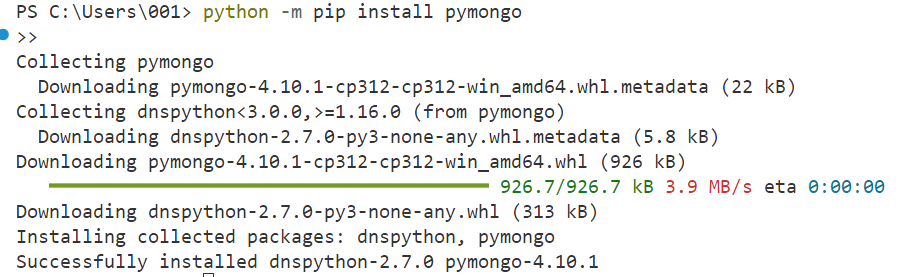


## **7.8.2 Create a new database (e.g. bookbazaar_reviews)**
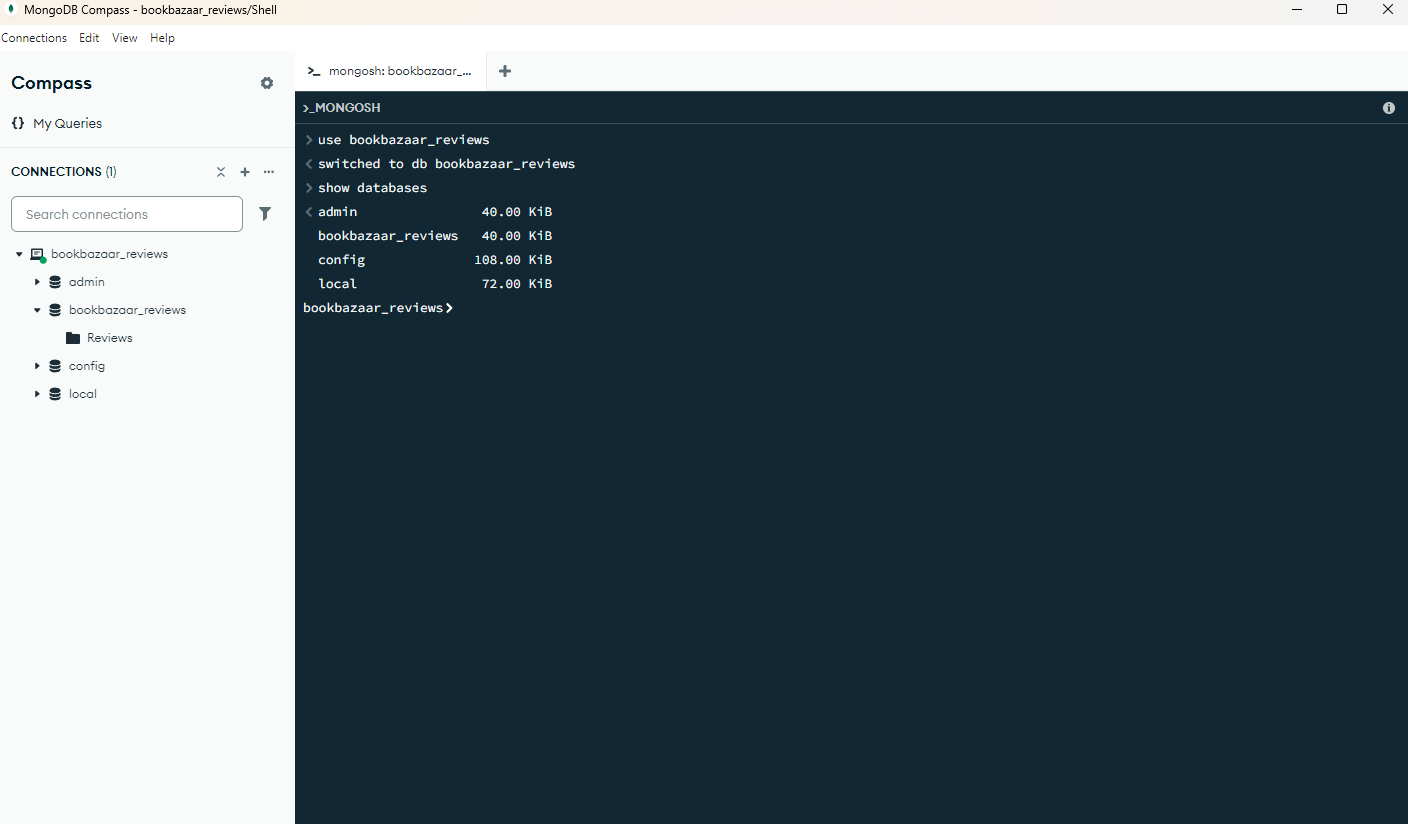

## **7.8.3 Set up user authentication for MongoDB if desired.**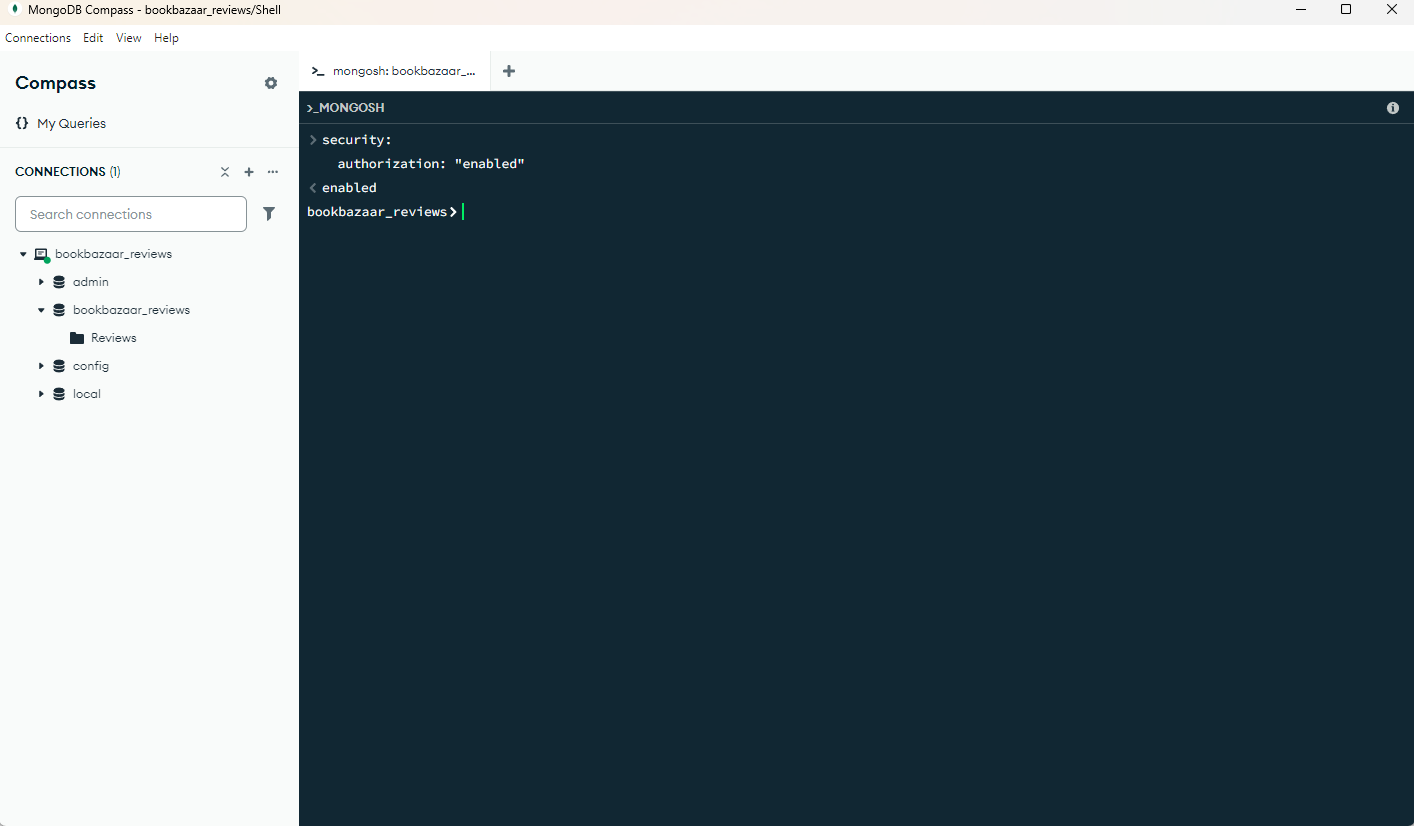

## **7.8.4 Confirm that you can connect to and interact with the database using the Mongo shell or a MongoDB client.**

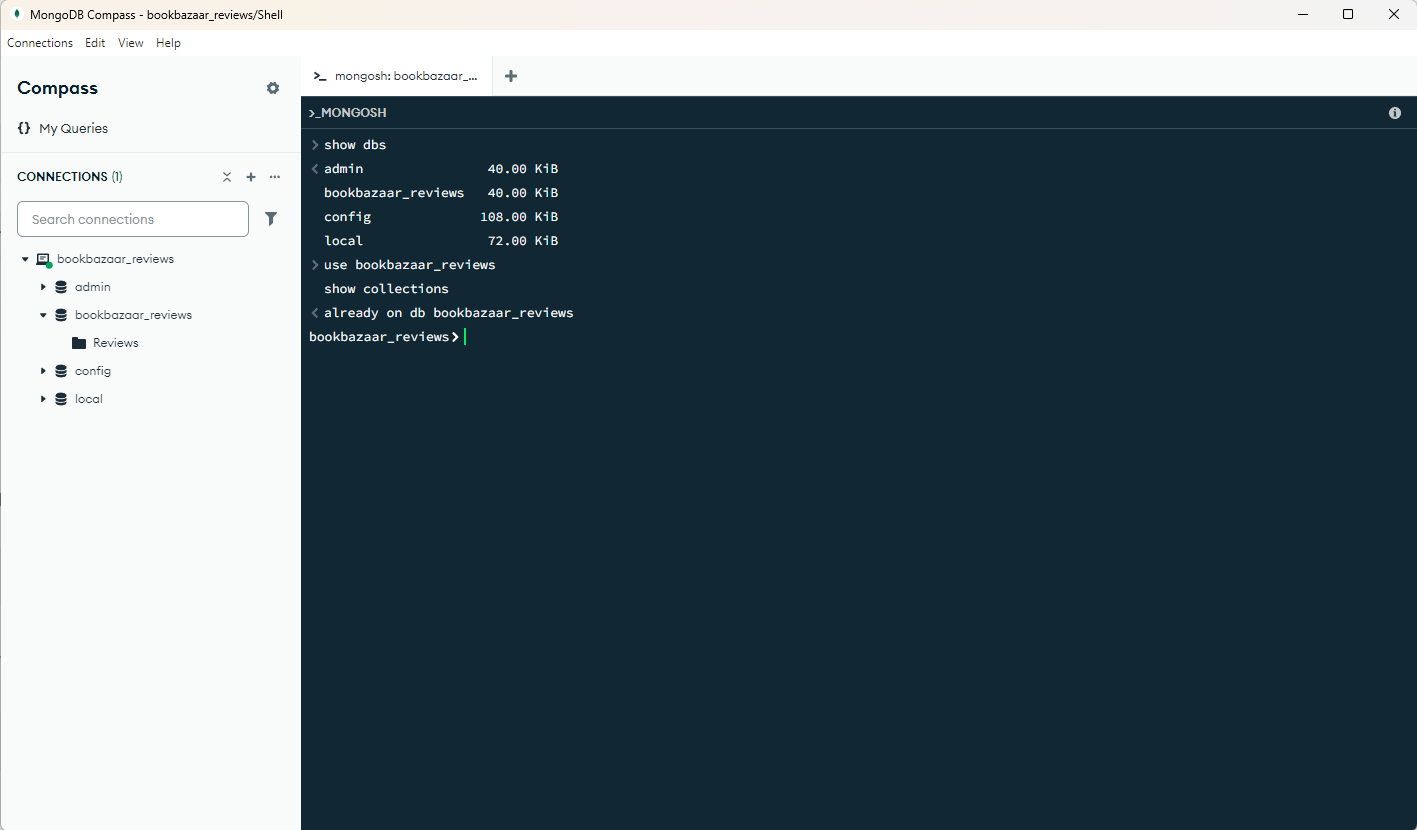

# 📌 **8. Task 9 : Connect Python to MongoDB Using PyMongo**
**Description**: You will use PyMongo, a Python driver for MongoDB, to connect your Python application to the MongoDB database. "

**Requirments**:
1.    Install pymongo
2.    Write a Python script or function to establish a connection to bookbazaar_reviews.
3.    Handle connection errors gracefully.
4.    Confirm that you can perform simple operations (like db.command('ping')) to validate the connection.

**Responsible:** Karen Emad and Dina Fakhry

## 8.9.1 Install pymango

In [4]:
# import pymango
try:
  from pymongo import MongoClient
  from pymongo.errors import ConnectionFailure
except:
  print("Faild to import pymango")
  !pip install pymongo
  print("Succefully installed pymango")
  from pymongo import MongoClient
  from pymongo.errors import ConnectionFailure

## 8.9.2 Write a python script or funciton to establish a connection to bookbazaar_reviews

## 8.9.3 Handle connection errors gracefully

In [5]:
def connect_to_mongodb():
    """
      Connects to the MongoDB database.
      Returns:
          db: The MongoDB database object if the connection is successful.
    """
    try:
        client = MongoClient("mongodb://localhost:27017/")

        # Specify the database name
        db = client["bookbazaar_reviews"]

        print("Connected to MongoDB successfully!")
        return db
    except ConnectionFailure as e:
        print(f"Connection failed: {e}")
        return None

database = connect_to_mongodb()

Connected to MongoDB successfully!


## 8.9.4 Confirm that you can perform simple operations (like db.command('ping')) to validate the connection.

In [6]:
client = MongoClient("mongodb://localhost:27017/")
db = client["bookbazaar_reviews"]
db.command("ping")

{'ok': 1.0}

# 📌 **9. Task 10 : Implement CRUD Operations on MongoDB via Python**
**Description**: You will create functions in Python to perform CRUD operations on the Reviews collection stored in MongoDB."

**Requirments**:
1.     Implement a function to add a new review.
2.     Implement a function to retrieve reviews for a specific book.
3.     Implement functions to update and delete reviews by their unique identifiers (e.g., review_id)
4.     Ensure proper error handling (e.g., handle cases where a review does not exist).  

**Responsible:** Karen Emad and Dina Fakhry

## 9.10.1  Implement a function to add a new review

In [7]:

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

uri = "mongodb+srv://<db_username>:<db_password>@cluster0.fw91d.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

bad auth : Authentication failed., full error: {'ok': 0, 'errmsg': 'bad auth : Authentication failed.', 'code': 8000, 'codeName': 'AtlasError'}


In [8]:
from pymongo import MongoClient
from pymongo.errors import PyMongoError
from bson.objectid import ObjectId

def connect_to_mongodb(uri, database_name):
    """
    Establishes a connection to the specified MongoDB database.
    :param uri: MongoDB connection URI
    :param database_name: Name of the database to connect to
    :return: Database object if connection is successful, None otherwise
    """
    try:
        client = MongoClient(uri)
        db = client[database_name]
        print(f"Connected to MongoDB database: {database_name}")
        return db
    except PyMongoError as e:
        print(f"Error connecting to MongoDB: {e}")
        return None

In [9]:
def add_review(collection, review_data):
    """
    Adds a new review to the collection.
    :param collection: MongoDB collection object
    :param review_data: Dictionary containing the review details
    :return: Inserted ID or None
    """
    try:
        result = collection.insert_one(review_data)
        print(f"Review added with ID: {result.inserted_id}")
        return result.inserted_id
    except PyMongoError as e:
        print(f"Error adding review: {e}")
        return None

## 9.10.2 Implement a function to retrieve reviews for a specific book

In [10]:
def get_reviews_by_book(collection, book_id):
    """
    Retrieves reviews for a specific book.
    :param collection: MongoDB collection object
    :param book_id: The ID of the book to fetch reviews for
    :return: List of reviews or empty list
    """
    try:
        reviews = list(collection.find({"book_id": book_id}))
        if reviews:
            print(f"Found {len(reviews)} reviews for book ID: {book_id}")
        else:
            print(f"No reviews found for book ID: {book_id}")
        return reviews
    except PyMongoError as e:
        print(f"Error retrieving reviews: {e}")
        return []

## 9.10.3 Implement functions to update and delete reviews by their unique identifiers (e.g., review_id).

In [11]:
def update_review_by_id(collection, review_id, update_data):
    """
    Updates a review by its unique ID.
    :param collection: MongoDB collection object
    :param review_id: The unique ID of the review to update
    :param update_data: Dictionary containing the fields to update
    :return: True if update was successful, False otherwise
    """
    try:
        result = collection.update_one({"_id": ObjectId(review_id)}, {"$set": update_data})
        if result.matched_count > 0:
            print(f"Review with ID {review_id} updated successfully.")
            return True
        else:
            print(f"No review found with ID {review_id}.")
            return False
    except PyMongoError as e:
        print(f"Error updating review: {e}")
        return False

def delete_review_by_id(collection, review_id):
    """
    Deletes a review by its unique ID.
    :param collection: MongoDB collection object
    :param review_id: The unique ID of the review to delete
    :return: True if deletion was successful, False otherwise
    """
    try:
        result = collection.delete_one({"_id": ObjectId(review_id)})
        if result.deleted_count > 0:
            print(f"Review with ID {review_id} deleted successfully.")
            return True
        else:
            print(f"No review found with ID {review_id}.")
            return False
    except PyMongoError as e:
        print(f"Error deleting review: {e}")
        return False

In [15]:
if __name__ == "__main__":

    mongo_uri = "mongodb://localhost:27017/"
    db_name = "bookbazaar_reviews"
    collection_name = "Reviews"

    db = connect_to_mongodb(mongo_uri, db_name)
    if db is not None:  # Explicitly check if the database object is not None
        reviews_collection = db[collection_name]

        #Add new reviews
        ai_books = [
            {
                "book_id": "001",
                "title": "Artificial Intelligence: A Guide to Intelligent Systems",
                "author": "Michael Negnevitsky",
                "user": "Ali",
                "rating": 5,
                "comment": "A great introduction to AI concepts with practical examples."
            },
            {
                "book_id": "002",
                "title": "Artificial Intelligence: A New Synthesis",
                "author": "Nils J. Nilsson",
                "user": "Noha",
                "rating": 4,
                "comment": "Comprehensive coverage of AI topics, but can be dense at times."
            },
            {
                "book_id": "003",
                "title": "AI Superpowers: China, Silicon Valley, and the New World Order",
                "author": "Kai-Fu Lee",
                "user": "Sarah",
                "rating": 5,
                "comment": "Insightful discussion on AI's global impact and future trends."
            },
            {
                "book_id": "004",
                "title": "Deep Learning",
                "author": "Ian Goodfellow, Yoshua Bengio, Aaron Courville",
                "user": "Noha",
                "rating": 5,
                "comment": "A must-read for anyone diving deep into neural networks and deep learning."
            },
            {
                "book_id": "005",
                "title": "Human Compatible: Artificial Intelligence and the Problem of Control",
                "author": "Stuart Russell",
                "user": "Ali",
                "rating": 4,
                "comment": "Thought-provoking discussion on AI ethics and control."
            }
        ]

        # Adding book reviews
        for book in ai_books:
            add_review(reviews_collection, book)

        # Retrieve reviews for a specific book by its ID
        target_book_id = "003"
        book_reviews = get_reviews_by_book(reviews_collection, target_book_id)
        for review in book_reviews:
            print(f"Review for book '{review.get('title')}': {review}")


Connected to MongoDB database: bookbazaar_reviews
Review added with ID: 6785230a6b1b39e818ef54df
Review added with ID: 6785230a6b1b39e818ef54e0
Review added with ID: 6785230a6b1b39e818ef54e1
Review added with ID: 6785230a6b1b39e818ef54e2
Review added with ID: 6785230a6b1b39e818ef54e3
Found 1 reviews for book ID: 003
Review for book 'AI Superpowers: China, Silicon Valley, and the New World Order': {'_id': ObjectId('6785230a6b1b39e818ef54e1'), 'book_id': '003', 'title': 'AI Superpowers: China, Silicon Valley, and the New World Order', 'author': 'Kai-Fu Lee', 'user': 'Sarah', 'rating': 5, 'comment': "Insightful discussion on AI's global impact and future trends."}


In [16]:
# def delete_all_documents(collection):
#     result = collection.delete_many({})
#     print(f"Deleted {result.deleted_count} documents from the collection.")

# def drop_collection(db, collection_name):
#     db[collection_name].drop()
#     print(f"The collection '{collection_name}' has been dropped.")

# def drop_database(client, db_name):
#     client.drop_database(db_name)
#     print(f"The database '{db_name}' has been dropped.")

# if __name__ == "__main__":
#     mongo_uri = "mongodb://localhost:27017/"
#     db_name = "bookbazaar_reviews"
#     collection_name = "Reviews"

#     try:
#         client = MongoClient(mongo_uri)
#         db = client[db_name]
#         collection = db[collection_name]

#         delete_all_documents(collection)

#         drop_collection(db, collection_name)
#         drop_database(client, db_name)

#     except Exception as e:
#         print(f"An error occurred: {e}")
#     finally:
#         client.close()


Deleted 5 documents from the collection.
The collection 'Reviews' has been dropped.
The database 'bookbazaar_reviews' has been dropped.
